# regresión lineal

## Plan
* Leer archivos
* Ejecutar Regresión Multilineal
* Ejectutar LGBMRegresor

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt

In [3]:
trm_reg_df=pd.read_csv('2.RESULTADOS/base_reg_trm.csv', sep=',',encoding = "ISO-8859-1", engine='python', decimal=".")
petroleo_reg_df=pd.read_csv('2.RESULTADOS/base_reg_petroleo.csv', sep=',',encoding = "ISO-8859-1", engine='python', decimal=".")
oro_reg_df=pd.read_csv('2.RESULTADOS/base_reg_oro.csv', sep=',',encoding = "ISO-8859-1", engine='python', decimal=".")

In [4]:
trm_corr_df=pd.read_csv('2.RESULTADOS/resultados_corr_trm.csv', sep=',',encoding = "ISO-8859-1", engine='python', decimal=".")
petroleo_corr_df=pd.read_csv('2.RESULTADOS/resultados_corr_petroleo.csv', sep=',',encoding = "ISO-8859-1", engine='python', decimal=".")
oro_corr_df=pd.read_csv('2.RESULTADOS/resultados_corr_oro.csv', sep=',',encoding = "ISO-8859-1", engine='python', decimal=".")

In [5]:
trm_reg_df.set_index('date',inplace=True)

In [6]:
trm_corr_df.describe()

,Unnamed: 0,cuenta,corr,corrPearson,corrKendall,corrSpearman
count,166.000000,166.000000,164.000000,164.000000,164.000000,164.000000
mean,82.500000,41.072289,0.022387,0.022387,0.009504,0.018213
std,48.064193,15.579538,0.189382,0.189382,0.147877,0.187886
min,0.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,41.250000,38.000000,-0.088406,-0.088406,-0.063188,-0.092163
50%,82.500000,42.000000,0.021636,0.021636,0.014429,0.019047
75%,123.750000,51.750000,0.121303,0.121303,0.087288,0.123171
max,165.000000,70.000000,0.821835,0.821835,0.466667,0.542857


In [7]:
trm_corr_df

,Unnamed: 0,id,cuenta,corr,corrPearson,corrKendall,corrSpearman,tipo
0,0,twitter_BancoRepublica,70,-0.092414,-0.092414,-0.075010,-0.131148,twitter
1,1,twitter_MantillaIgnacio,69,-0.063632,-0.063632,-0.082729,-0.114142,twitter
2,2,twitter_NASA,68,0.293938,0.293938,0.166008,0.241273,twitter
3,3,twitter_Fondosdepension,68,-0.150526,-0.150526,-0.025928,-0.049855,twitter
4,4,twitter_ecofeminita,67,0.093343,0.093343,0.097893,0.157176,twitter
...,...,...,...,...,...,...,...,...
161,161,twitter_alhosu,6,0.821835,0.821835,0.466667,0.542857,twitter
162,162,rss_https://feeds.a.dj.com/rss/RSSLifestyle.xml,5,-0.454443,-0.454443,-0.600000,-0.700000,rss
163,163,twitter_NoelMllr,2,-1.000000,-1.000000,-1.000000,-1.000000,twitter
164,164,twitter_jscorrales,1,NaN,NaN,NaN,NaN,twitter


In [8]:
#eliminar estas columnas
trm_corr_df[trm_corr_df['cuenta']<5]['id'].values

array(['twitter_NoelMllr', 'twitter_jscorrales', 'twitter_RaquelBernal3'],
      dtype=object)

In [9]:
trm_reg_df.shape

(70, 167)

In [10]:
trm_reg_df

,rss_http://elnacional.com.do/feed/,rss_http://ep00.epimg.net/rss/economia/portada.xml,rss_http://ep00.epimg.net/rss/tags/ultimas_noticias.xml,rss_http://feeds.nytimes.com/nyt/rss/Business,rss_http://feeds.nytimes.com/nyt/rss/Technology,rss_http://feeds.washingtonpost.com/rss/national,rss_http://feeds.washingtonpost.com/rss/national/energy-environment,rss_http://feeds.washingtonpost.com/rss/politics,rss_http://feeds.washingtonpost.com/rss/rss_blogpost,rss_http://feeds.washingtonpost.com/rss/rss_digger,...,twitter_rafaelpuyana,twitter_razuero,twitter_rchicave,twitter_rcnmundo,twitter_rcnradio,twitter_rodriguezbraun,twitter_sergiodigra,twitter_suanzes,twitter_wef,Diferencia
date,,,,,,,,,,,,,,,,,,,,,
2021-12-30,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.441825,0.000000,0.000000,0.000000,...,0.000,0.000,0.000000,0.000000,0.000000,0.000000,-0.799667,0.000000,0.000000,-42.52
2022-01-03,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.592650,0.000000,0.000000,0.000000,...,-0.948,0.000,0.000000,0.000000,0.000000,0.000000,-0.707000,0.000000,0.000000,101.59
2022-01-04,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,-0.051600,0.000000,0.000000,0.000000,...,0.000,-0.004,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.36
2022-01-05,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.510600,0.000000,0.000000,0.000000,...,0.000,0.000,0.000000,0.000000,0.000000,0.000000,-0.962000,0.000000,0.000000,-41.75
2022-01-06,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,-0.474600,0.000000,0.000000,0.000000,...,0.000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.276211,0.000000,-3.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-07,-0.356600,0.000,0.283778,-0.137087,-0.253625,-0.118538,0.223333,-0.002042,-0.398167,0.404000,...,0.000,0.000,-0.414368,-0.474480,-0.439410,-0.645571,-0.303333,0.000000,0.240417,25.32
2022-04-08,-0.477067,0.000,0.213333,-0.004034,-0.070875,-0.151571,0.235750,0.049643,-0.427453,0.000000,...,0.000,0.000,-0.573576,-0.491955,-0.486162,-0.572182,-0.518200,0.000000,0.159167,5.58
2022-04-11,-0.403324,0.000,0.014500,-0.094467,-0.133750,-0.524571,-0.556000,-0.233187,-0.147259,-0.105000,...,0.000,0.000,-0.545357,-0.494315,-0.617303,-0.451800,-0.158000,0.000000,0.198333,-33.25


In [11]:
trm_reg_df.drop(columns=trm_corr_df[trm_corr_df['cuenta']<5]['id'].values,inplace=True)

In [12]:
val=trm_reg_df.isnull().sum().to_frame()
val

,0
rss_http://elnacional.com.do/feed/,0
rss_http://ep00.epimg.net/rss/economia/portada.xml,0
rss_http://ep00.epimg.net/rss/tags/ultimas_noticias.xml,0
rss_http://feeds.nytimes.com/nyt/rss/Business,0
rss_http://feeds.nytimes.com/nyt/rss/Technology,0
...,...
twitter_rodriguezbraun,0
twitter_sergiodigra,0
twitter_suanzes,0
twitter_wef,0


In [13]:
val[val[0]>0]

,0


In [14]:
val2=trm_reg_df.sum().to_frame()
val2

,0
rss_http://elnacional.com.do/feed/,-20.052538
rss_http://ep00.epimg.net/rss/economia/portada.xml,-14.305312
rss_http://ep00.epimg.net/rss/tags/ultimas_noticias.xml,7.006897
rss_http://feeds.nytimes.com/nyt/rss/Business,-0.288835
rss_http://feeds.nytimes.com/nyt/rss/Technology,-0.628786
...,...
twitter_rodriguezbraun,-29.609693
twitter_sergiodigra,-21.184238
twitter_suanzes,-26.229755
twitter_wef,15.321099


In [15]:
val2[val2[0]==0]

,0


In [16]:
trm_reg_df

,rss_http://elnacional.com.do/feed/,rss_http://ep00.epimg.net/rss/economia/portada.xml,rss_http://ep00.epimg.net/rss/tags/ultimas_noticias.xml,rss_http://feeds.nytimes.com/nyt/rss/Business,rss_http://feeds.nytimes.com/nyt/rss/Technology,rss_http://feeds.washingtonpost.com/rss/national,rss_http://feeds.washingtonpost.com/rss/national/energy-environment,rss_http://feeds.washingtonpost.com/rss/politics,rss_http://feeds.washingtonpost.com/rss/rss_blogpost,rss_http://feeds.washingtonpost.com/rss/rss_digger,...,twitter_rafaelpuyana,twitter_razuero,twitter_rchicave,twitter_rcnmundo,twitter_rcnradio,twitter_rodriguezbraun,twitter_sergiodigra,twitter_suanzes,twitter_wef,Diferencia
date,,,,,,,,,,,,,,,,,,,,,
2021-12-30,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.441825,0.000000,0.000000,0.000000,...,0.000,0.000,0.000000,0.000000,0.000000,0.000000,-0.799667,0.000000,0.000000,-42.52
2022-01-03,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.592650,0.000000,0.000000,0.000000,...,-0.948,0.000,0.000000,0.000000,0.000000,0.000000,-0.707000,0.000000,0.000000,101.59
2022-01-04,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,-0.051600,0.000000,0.000000,0.000000,...,0.000,-0.004,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.36
2022-01-05,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.510600,0.000000,0.000000,0.000000,...,0.000,0.000,0.000000,0.000000,0.000000,0.000000,-0.962000,0.000000,0.000000,-41.75
2022-01-06,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,-0.474600,0.000000,0.000000,0.000000,...,0.000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.276211,0.000000,-3.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-07,-0.356600,0.000,0.283778,-0.137087,-0.253625,-0.118538,0.223333,-0.002042,-0.398167,0.404000,...,0.000,0.000,-0.414368,-0.474480,-0.439410,-0.645571,-0.303333,0.000000,0.240417,25.32
2022-04-08,-0.477067,0.000,0.213333,-0.004034,-0.070875,-0.151571,0.235750,0.049643,-0.427453,0.000000,...,0.000,0.000,-0.573576,-0.491955,-0.486162,-0.572182,-0.518200,0.000000,0.159167,5.58
2022-04-11,-0.403324,0.000,0.014500,-0.094467,-0.133750,-0.524571,-0.556000,-0.233187,-0.147259,-0.105000,...,0.000,0.000,-0.545357,-0.494315,-0.617303,-0.451800,-0.158000,0.000000,0.198333,-33.25


In [17]:
y_train = trm_reg_df['Diferencia']
X_train = trm_reg_df.drop(columns=['Diferencia'])

### División columnas en lotes

In [18]:
X_train.shape

(70, 163)

In [19]:
X_train1  = X_train.iloc[: , :55]

In [20]:
# Cálculo VIFs
vif = pd.DataFrame()
vif['Features'] = X_train1.columns
vif['VIF'] = [variance_inflation_factor(X_train1.values, i) for i in range(X_train1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
26,rss_http://rssfeeds.usatoday.com/UsatodaycomNa...,364.02
0,rss_http://elnacional.com.do/feed/,290.70
31,rss_http://www.eltiempo.com/rss/economia.xml,137.01
17,rss_http://feeds.washingtonpost.com/rss/world,100.73
40,rss_http://www.eltiempo.com/rss/tecnosfera.xml,89.51
30,rss_http://www.eltiempo.com/rss/deportes.xml,82.89
36,rss_http://www.eltiempo.com/rss/mundo.xml,70.26
33,rss_http://www.eltiempo.com/rss/economia_finan...,66.71
35,rss_http://www.eltiempo.com/rss/economia_secto...,62.46
38,rss_http://www.eltiempo.com/rss/mundo_europa.xml,59.05


In [21]:
#Seleccionar VIF menores a 50
seleccionColumnas1= vif[vif['VIF']<50]['Features'].values

In [22]:
X_train1=X_train1[seleccionColumnas1]

In [23]:
len(seleccionColumnas1)

44

In [24]:
X_train_lm = sm.add_constant(X_train1)
lr_1 = sm.OLS(y_train, X_train_lm).fit()
lr_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Diferencia   R-squared:                       0.598
Model:                            OLS   Adj. R-squared:                 -0.110
Method:                 Least Squares   F-statistic:                    0.8443
Date:                Fri, 22 Apr 2022   Prob (F-statistic):              0.695
Time:                        17:51:44   Log-Likelihood:                -306.12
No. Observations:                  70   AIC:                             702.2
Df Residuals:                      25   BIC:                             803.4
Df Model:                          44                                         
Covariance Type:            nonrobust                                         
===========================================================================================================================================
                                                                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------
const                                                                      13.9577     16.810      0.830      0.414     -20.663      48.578
rss_http://www.portafolio.co/rss/economia/finanzas                        -17.2044     37.690     -0.456      0.652     -94.828      60.419
rss_http://www.portafolio.co/rss/economia                                   1.7530     41.168      0.043      0.966     -83.033      86.539
rss_http://feeds.washingtonpost.com/rss/sports                            298.1476    212.555      1.403      0.173    -139.617     735.912
rss_http://www.nytimes.com/services/xml/rss/nyt/World.xml                  -9.9601     73.659     -0.135      0.894    -161.664     141.744
rss_http://feeds.washingtonpost.com/rss/rss_morning-mix                    12.7415     40.153      0.317      0.754     -69.955      95.438
rss_http://feeds.washingtonpost.com/rss/rss_blogpost                       38.2184     36.666      1.042      0.307     -37.297     113.734
rss_http://feeds.washingtonpost.com/rss/national                          -14.8538     43.155     -0.344      0.734    -103.732      74.025
rss_http://www.nytimes.com/services/xml/rss/nyt/Sports.xml                 27.1452     49.813      0.545      0.591     -75.446     129.737
rss_http://www.nytimes.com/services/xml/rss/nyt/NYRegion.xml                8.5832     69.478      0.124      0.903    -134.510     151.676
rss_http://rssfeeds.usatoday.com/usatoday-NewsTopStories                   -2.2328     18.253     -0.122      0.904     -39.826      35.360
rss_http://feeds.washingtonpost.com/rss/rss_powerpost                      -6.9338     45.734     -0.152      0.881    -101.125      87.257
rss_http://www.eltiempo.com/rss/cultura.xml                                72.9903     44.104      1.655      0.110     -17.843     163.824
rss_http://ep00.epimg.net/rss/tags/ultimas_noticias.xml                    13.6223     28.349      0.481      0.635     -44.763      72.008
rss_http://www.eltiempo.com/rss/economia_sector-financiero.xml             21.1734     18.833      1.124      0.272     -17.614      59.961
rss_http://feeds.washingtonpost.com/rss/rss_fact-checker                  -39.5402     32.843     -1.204      0.240    -107.181      28.101
rss_http://feeds.washingtonpost.com/rss/rss_the-fix                       -12.7384     27.517     -0.463      0.647     -69.410      43.933
rss_http://portafolio.co/rss/mis-finanzas                                  30.0752     17.847      1.685      0.104      -6.682      66.832
rss_http://feeds.washingtonpost.com/rss/politics                           -0.5175     49.775     -0.010      0.992    -103.031     101.997
rss

In [25]:
pvalue=lr_1.pvalues.to_frame('pvalue')
pvalue[pvalue['pvalue']<=0.3]

,pvalue
rss_http://feeds.washingtonpost.com/rss/sports,0.173007
rss_http://www.eltiempo.com/rss/cultura.xml,0.110433
rss_http://www.eltiempo.com/rss/economia_sector-financiero.xml,0.271578
rss_http://feeds.washingtonpost.com/rss/rss_fact-checker,0.239895
rss_http://portafolio.co/rss/mis-finanzas,0.104402
rss_http://www.eltiempo.com/rss/economia_empresas.xml,0.078795
rss_http://feeds.washingtonpost.com/rss/rss_innovations,0.213615
rss_http://www.nytimes.com/services/xml/rss/nyt/HomePage.xml,0.174546
rss_http://www.nytimes.com/services/xml/rss/nyt/YourMoney.xml,0.289285
rss_http://portafolio.co/rss/mis-finanzas/ahorro,0.172583


In [26]:
seleccionColumnas1=pvalue[pvalue['pvalue']<=0.3].index.values
seleccionColumnas1

array(['rss_http://feeds.washingtonpost.com/rss/sports',
       'rss_http://www.eltiempo.com/rss/cultura.xml',
       'rss_http://www.eltiempo.com/rss/economia_sector-financiero.xml',
       'rss_http://feeds.washingtonpost.com/rss/rss_fact-checker',
       'rss_http://portafolio.co/rss/mis-finanzas',
       'rss_http://www.eltiempo.com/rss/economia_empresas.xml',
       'rss_http://feeds.washingtonpost.com/rss/rss_innovations',
       'rss_http://www.nytimes.com/services/xml/rss/nyt/HomePage.xml',
       'rss_http://www.nytimes.com/services/xml/rss/nyt/YourMoney.xml',
       'rss_http://portafolio.co/rss/mis-finanzas/ahorro',
       'rss_http://portafolio.co/rss/innovacion',
       'rss_http://www.nytimes.com/services/xml/rss/nyt/EnergyEnvironment.xml'],
      dtype=object)

### Grupo 2

In [27]:
X_train2  = X_train.iloc[: , 55:110]

In [28]:
# Cálculo VIFs
vif = pd.DataFrame()
vif['Features'] = X_train2.columns
vif['VIF'] = [variance_inflation_factor(X_train2.values, i) for i in range(X_train2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,rss_http://www.portafolio.co/rss/negocios/empr...,866.19
4,rss_http://www.portafolio.co/rss/negocios,692.71
31,twitter_CaracolRadio,514.98
34,twitter_ELTIEMPO,323.82
28,twitter_BluRadioCo,301.96
19,rss_https://www.eltiempo.com/rss/justicia.xml,203.45
23,rss_https://www.eltiempo.com/rss/politica.xml,163.03
8,rss_http://www.reforma.com/rss/negocios.xml,129.04
27,twitter_BancoRepublica,109.36
9,rss_http://www.reforma.com/rss/portada.xml,103.54


In [29]:
#Seleccionar VIF menores a 50
seleccionColumnas2= vif[vif['VIF']<50]['Features'].values

In [30]:
len(seleccionColumnas2)

42

In [31]:
X_train2=X_train2[seleccionColumnas2]

In [32]:
X_train_lm = sm.add_constant(X_train2)
lr_1 = sm.OLS(y_train, X_train_lm).fit()
lr_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Diferencia   R-squared:                       0.446
Model:                            OLS   Adj. R-squared:                 -0.416
Method:                 Least Squares   F-statistic:                    0.5172
Date:                Fri, 22 Apr 2022   Prob (F-statistic):              0.973
Time:                        17:51:46   Log-Likelihood:                -317.33
No. Observations:                  70   AIC:                             720.7
Df Residuals:                      27   BIC:                             817.4
Df Model:                          42                                         
Covariance Type:            nonrobust                                         
=============================================================================================================================
                                                                coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------
const                                                       -14.9967     36.485     -0.411      0.684     -89.858      59.865
twitter_Fondosdepension                                      34.2003     32.273      1.060      0.299     -32.019     100.419
rss_http://www.portafolio.co/rss/internacional                0.8953     37.801      0.024      0.981     -76.667      78.457
rss_http://www.reforma.com/rss/justicia.xml                  17.9151     28.134      0.637      0.530     -39.811      75.641
rss_https://www.clarin.com/rss/economia/                    -12.1304     37.473     -0.324      0.749     -89.018      64.758
twitter_LuisFelipeHenao                                     -22.8439     24.507     -0.932      0.360     -73.128      27.440
twitter_BvcColombia                                           4.6477     27.758      0.167      0.868     -52.307      61.602
rss_https://www.eltiempo.com/rss/mundo_latinoamerica.xml     14.0328     24.521      0.572      0.572     -36.280      64.346
twitter_AlbertoBernalLE                                     -33.2500     36.018     -0.923      0.364    -107.154      40.654
twitter_JorgeATovar                                          22.9565     22.924      1.001      0.326     -24.080      69.992
twitter_JoseILOPEZ                                          -27.2870     21.261     -1.283      0.210     -70.911      16.337
rss_https://www.eltiempo.com/rss/mundo_eeuu-y-canada.xml     -2.8405     26.904     -0.106      0.917     -58.043      52.362
rss_http://www.portafolio.co/rss/economia/gobierno           21.5038     31.509      0.682      0.501     -43.147      86.155
twitter_MantillaIgnacio                                      -5.7547     22.027     -0.261      0.796     -50.950      39.440
twitter_IECarballo                                          -29.3562     25.724     -1.141      0.264     -82.138      23.426
twitter_JorgeARestrepo                                       19.9853     25.305      0.790      0.437     -31.937      71.908
twitter_Jllanosala                                           -4.6457     15.122     -0.307      0.761     -35.674      26.383
twitter_MailOnline                                          -26.4832    113.978     -0.232      0.818    -260.347     207.381
rss_https://feeds.a.dj.com/rss/RSSWorldNews.xml             -61.1362     31.269     -1.955      0.061    -125.295       3.023
twitter_FT                                                  -28.5577    147.333     -0.194      0.848    -330.860     273.745
twitter_Maurotov                                              2.2362     24.076      0.093      0.927     -47.164      51.637
twitter_Cesaretamayo                                       

In [33]:
pvalue=lr_1.pvalues.to_frame('pvalue')
pvalue[pvalue['pvalue']<=0.3]

,pvalue
twitter_Fondosdepension,0.298663
twitter_JoseILOPEZ,0.210249
twitter_IECarballo,0.263818
rss_https://feeds.a.dj.com/rss/RSSWorldNews.xml,0.060989
twitter_CehernandezEcon,0.240453
rss_http://www.portafolio.co/rss/economia/infraestructura,0.241290


In [34]:
seleccionColumnas2=pvalue[pvalue['pvalue']<=0.3].index.values
seleccionColumnas2

array(['twitter_Fondosdepension', 'twitter_JoseILOPEZ',
       'twitter_IECarballo',
       'rss_https://feeds.a.dj.com/rss/RSSWorldNews.xml',
       'twitter_CehernandezEcon',
       'rss_http://www.portafolio.co/rss/economia/infraestructura'],
      dtype=object)

### Grupo 3

In [35]:
X_train3  = X_train.iloc[: , 110:]

In [36]:
# Cálculo VIFs
vif = pd.DataFrame()
vif['Features'] = X_train3.columns
vif['VIF'] = [variance_inflation_factor(X_train3.values, i) for i in range(X_train3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
22,twitter_bbcmundo,567.56
8,twitter_NoticiasRCN,540.24
28,twitter_elcolombiano,487.51
11,twitter_PublimetroCol,364.52
40,twitter_lafm,333.08
13,twitter_RevistaSemana,322.61
29,twitter_elespectador,321.22
47,twitter_rcnmundo,286.95
7,twitter_NoticiasCaracol,250.52
25,twitter_clarincom,224.35


In [37]:
#Seleccionar VIF menores a 50
seleccionColumnas3= vif[vif['VIF']<50]['Features'].values

In [38]:
len(seleccionColumnas3)

36

In [39]:
X_train3=X_train3[seleccionColumnas3]

In [40]:
X_train_lm = sm.add_constant(X_train3)
lr_1 = sm.OLS(y_train, X_train_lm).fit()
lr_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Diferencia   R-squared:                       0.610
Model:                            OLS   Adj. R-squared:                  0.184
Method:                 Least Squares   F-statistic:                     1.434
Date:                Fri, 22 Apr 2022   Prob (F-statistic):              0.149
Time:                        17:51:48   Log-Likelihood:                -305.04
No. Observations:                  70   AIC:                             684.1
Df Residuals:                      33   BIC:                             767.3
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      33.5995     23.578      1.425      0.164     -14.370      81.569
twitter_epeconomia        -20.5899     20.462     -1.006      0.322     -62.221      21.041
twitter_MinHacienda        -7.6022     25.310     -0.300      0.766     -59.096      43.891
twitter_RobertoAnguloS     18.1237     23.780      0.762      0.451     -30.257      66.505
twitter_mariovalencia01    -3.2221     18.374     -0.175      0.862     -40.605      34.161
twitter_Moliverag          -9.0407     22.215     -0.407      0.687     -54.238      36.157
twitter_josecdiez         -22.7072     20.186     -1.125      0.269     -63.776      18.361
twitter_NBCNews          -112.5330     48.319     -2.329      0.026    -210.840     -14.226
twitter_Minvivienda        40.2249     16.904      2.380      0.023       5.834      74.616
twitter_agaviriau           5.4856     19.899      0.276      0.785     -35.000      45.971
twitter_wef                28.0639     45.802      0.613      0.544     -65.122     121.250
twitter_rchicave           -2.2126     21.378     -0.103      0.918     -45.706      41.281
twitter_OskarNupia          7.1726     20.124      0.356      0.724     -33.769      48.114
twitter__minecogob         25.3737     20.780      1.221      0.231     -16.903      67.650
twitter_jrobertoacosta1    21.4973     16.219      1.325      0.194     -11.500      54.495
twitter_NASA               52.1954     24.849      2.101      0.043       1.641     102.750
twitter_suanzes           -37.1856     19.944     -1.864      0.071     -77.762       3.391
twitter_ecofeminita        35.9871     15.407      2.336      0.026       4.640      67.334
twitter_Victor_Malagon      8.5601     16.373      0.523      0.605     -24.751      41.871
twitter_freddykastro       -6.8247     11.727     -0.582      0.565     -30.684      17.034
twitter_jleibovi            7.4621      9.401      0.794      0.433     -11.664      26.588
twitter_castellanosgd       9.0979     10.598      0.858      0.397     -12.464      30.660
twitter_Rohgal             -2.3683     12.839     -0.184      0.855     -28.489      23.752
twitter_RodLuisAlberto     -7.4415     13.349     -0.557      0.581     -34.600      19.717
twitter_japebu              0.1606     10.543      0.015      0.988     -21.289      21.611
twitter_estebanpie         17.8593     14.272      1.251      0.220     -11.178      46.897
twitter_mahofste           -0.9222     13.542     -0.068      0.946     -28.473      26.629
twitter_rafaelpuyana      -20.9560     13.287     -1.577      0.124     -47.989       6.077
twitter_amaldon19          25.5810     14.374      1.780      0.084      -3.664      54.826
twitter_sergiodigra       -26.0911     11.317     -2.305      0.028     -49.116      -3.067
twitter_razuero            -2.6003     20.710  

In [41]:
pvalue=lr_1.pvalues.to_frame('pvalue')
pvalue[pvalue['pvalue']<=0.3]

,pvalue
const,0.163537
twitter_josecdiez,0.268747
twitter_NBCNews,0.026133
twitter_Minvivienda,0.023265
twitter__minecogob,0.230704
twitter_jrobertoacosta1,0.194123
twitter_NASA,0.043404
twitter_suanzes,0.071169
twitter_ecofeminita,0.025734
twitter_estebanpie,0.219619


In [42]:
seleccionColumnas3=pvalue[pvalue['pvalue']<=0.3].index.values
seleccionColumnas3

array(['const', 'twitter_josecdiez', 'twitter_NBCNews',
       'twitter_Minvivienda', 'twitter__minecogob',
       'twitter_jrobertoacosta1', 'twitter_NASA', 'twitter_suanzes',
       'twitter_ecofeminita', 'twitter_estebanpie',
       'twitter_rafaelpuyana', 'twitter_amaldon19', 'twitter_sergiodigra',
       'twitter_carlos_g_ospino', 'twitter_jagallegod'], dtype=object)

### Analisis columans seleccionadas

In [43]:
len(seleccionColumnas3)

15

In [44]:
print( len(seleccionColumnas1) , len(seleccionColumnas2), len(seleccionColumnas3))

12 6 15


In [45]:
seleccionColumnas_fin=np.concatenate((seleccionColumnas1 , seleccionColumnas2, seleccionColumnas3))

In [46]:
seleccionColumnas_fin=np.delete(seleccionColumnas_fin, np.where(seleccionColumnas_fin=='const'))
seleccionColumnas_fin

array(['rss_http://feeds.washingtonpost.com/rss/sports',
       'rss_http://www.eltiempo.com/rss/cultura.xml',
       'rss_http://www.eltiempo.com/rss/economia_sector-financiero.xml',
       'rss_http://feeds.washingtonpost.com/rss/rss_fact-checker',
       'rss_http://portafolio.co/rss/mis-finanzas',
       'rss_http://www.eltiempo.com/rss/economia_empresas.xml',
       'rss_http://feeds.washingtonpost.com/rss/rss_innovations',
       'rss_http://www.nytimes.com/services/xml/rss/nyt/HomePage.xml',
       'rss_http://www.nytimes.com/services/xml/rss/nyt/YourMoney.xml',
       'rss_http://portafolio.co/rss/mis-finanzas/ahorro',
       'rss_http://portafolio.co/rss/innovacion',
       'rss_http://www.nytimes.com/services/xml/rss/nyt/EnergyEnvironment.xml',
       'twitter_Fondosdepension', 'twitter_JoseILOPEZ',
       'twitter_IECarballo',
       'rss_https://feeds.a.dj.com/rss/RSSWorldNews.xml',
       'twitter_CehernandezEcon',
       'rss_http://www.portafolio.co/rss/economia/infraest

In [47]:
len(seleccionColumnas_fin)

32

In [48]:
# mirar si en las seleccionadas están las de mayor correlación

In [49]:
X_train_f=X_train[seleccionColumnas_fin]

In [50]:
# Cálculo VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_f.columns
vif['VIF'] = [variance_inflation_factor(X_train_f.values, i) for i in range(X_train_f.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,twitter_Fondosdepension,20.05
18,twitter_josecdiez,15.67
14,twitter_IECarballo,14.10
20,twitter_Minvivienda,9.99
25,twitter_ecofeminita,9.65
21,twitter__minecogob,8.29
23,twitter_NASA,6.98
2,rss_http://www.eltiempo.com/rss/economia_secto...,6.68
22,twitter_jrobertoacosta1,6.46
24,twitter_suanzes,6.32


In [51]:
# lleva a conclusiones  grafica
X_train_lm = sm.add_constant(X_train_f)
lr_1 = sm.OLS(y_train, X_train_lm).fit()
lr_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Diferencia   R-squared:                       0.737
Model:                            OLS   Adj. R-squared:                  0.509
Method:                 Least Squares   F-statistic:                     3.239
Date:                Fri, 22 Apr 2022   Prob (F-statistic):           0.000363
Time:                        17:51:53   Log-Likelihood:                -291.26
No. Observations:                  70   AIC:                             648.5
Df Residuals:                      37   BIC:                             722.7
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
=========================================================================================================================================
                                                                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------
const                                                                    29.9633     21.056      1.423      0.163     -12.701      72.627
rss_http://feeds.washingtonpost.com/rss/sports                          135.4296     83.855      1.615      0.115     -34.477     305.336
rss_http://www.eltiempo.com/rss/cultura.xml                              30.5699     21.584      1.416      0.165     -13.163      74.303
rss_http://www.eltiempo.com/rss/economia_sector-financiero.xml            1.4819     10.572      0.140      0.889     -19.939      22.903
rss_http://feeds.washingtonpost.com/rss/rss_fact-checker                  0.7102     16.523      0.043      0.966     -32.768      34.189
rss_http://portafolio.co/rss/mis-finanzas                                 9.4622      8.739      1.083      0.286      -8.245      27.169
rss_http://www.eltiempo.com/rss/economia_empresas.xml                    34.4862     12.044      2.863      0.007      10.082      58.891
rss_http://feeds.washingtonpost.com/rss/rss_innovations                 -13.8371     15.258     -0.907      0.370     -44.753      17.079
rss_http://www.nytimes.com/services/xml/rss/nyt/HomePage.xml             10.9208     16.463      0.663      0.511     -22.436      44.277
rss_http://www.nytimes.com/services/xml/rss/nyt/YourMoney.xml            27.9063     12.805      2.179      0.036       1.962      53.851
rss_http://portafolio.co/rss/mis-finanzas/ahorro                        -17.2621     15.951     -1.082      0.286     -49.583      15.059
rss_http://portafolio.co/rss/innovacion                                  25.1994     11.386      2.213      0.033       2.130      48.269
rss_http://www.nytimes.com/services/xml/rss/nyt/EnergyEnvironment.xml    25.4295     11.064      2.298      0.027       3.011      47.848
twitter_Fondosdepension                                                  -0.0795     15.634     -0.005      0.996     -31.756      31.597
twitter_JoseILOPEZ                                                       -3.1688      9.208     -0.344      0.733     -21.825      15.488
twitter_IECarballo                                                       -5.0685     16.307     -0.311      0.758     -38.109      27.972
rss_https://feeds.a.dj.com/rss/RSSWorldNews.xml                         -39.0016     16.305     -2.392      0.022     -72.038      -5.965
twitter_CehernandezEcon                                                  -1.5012      9.195     -0.163      0.871     -20.133      17.131
rss_http://www.portafolio.co/rss/economia/infraestructura                -3.2093      9.759     -0.329      0.744     -22.983      16.564
twitter_josecdiez                              

In [52]:
pvalue=lr_1.pvalues.to_frame('pvalue')
pvalue[pvalue['pvalue']<=0.3]

,pvalue
const,0.163109
rss_http://feeds.washingtonpost.com/rss/sports,0.114797
rss_http://www.eltiempo.com/rss/cultura.xml,0.165039
rss_http://portafolio.co/rss/mis-finanzas,0.285923
rss_http://www.eltiempo.com/rss/economia_empresas.xml,0.006867
rss_http://www.nytimes.com/services/xml/rss/nyt/YourMoney.xml,0.035742
rss_http://portafolio.co/rss/mis-finanzas/ahorro,0.286183
rss_http://portafolio.co/rss/innovacion,0.033126
rss_http://www.nytimes.com/services/xml/rss/nyt/EnergyEnvironment.xml,0.027291
rss_https://feeds.a.dj.com/rss/RSSWorldNews.xml,0.021950


In [53]:
#seleccion adicional para validar
seleccionColumnas_cf=pvalue[pvalue['pvalue']<=0.3].index.values

In [54]:
seleccionColumnas_cf=np.delete(seleccionColumnas_cf, np.where(seleccionColumnas_cf=='const'))
seleccionColumnas_cf

array(['rss_http://feeds.washingtonpost.com/rss/sports',
       'rss_http://www.eltiempo.com/rss/cultura.xml',
       'rss_http://portafolio.co/rss/mis-finanzas',
       'rss_http://www.eltiempo.com/rss/economia_empresas.xml',
       'rss_http://www.nytimes.com/services/xml/rss/nyt/YourMoney.xml',
       'rss_http://portafolio.co/rss/mis-finanzas/ahorro',
       'rss_http://portafolio.co/rss/innovacion',
       'rss_http://www.nytimes.com/services/xml/rss/nyt/EnergyEnvironment.xml',
       'rss_https://feeds.a.dj.com/rss/RSSWorldNews.xml',
       'twitter_josecdiez', 'twitter_NBCNews', 'twitter_Minvivienda',
       'twitter_jrobertoacosta1', 'twitter_NASA', 'twitter_suanzes',
       'twitter_ecofeminita', 'twitter_estebanpie',
       'twitter_rafaelpuyana', 'twitter_amaldon19', 'twitter_sergiodigra',
       'twitter_carlos_g_ospino', 'twitter_jagallegod'], dtype=object)

In [55]:
X_train_cf=X_train[seleccionColumnas_cf]

In [56]:
# Cálculo VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_cf.columns
vif['VIF'] = [variance_inflation_factor(X_train_cf.values, i) for i in range(X_train_cf.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,twitter_josecdiez,9.92
11,twitter_Minvivienda,7.95
15,twitter_ecofeminita,5.66
14,twitter_suanzes,5.60
13,twitter_NASA,5.48
12,twitter_jrobertoacosta1,5.08
10,twitter_NBCNews,4.88
0,rss_http://feeds.washingtonpost.com/rss/sports,4.36
3,rss_http://www.eltiempo.com/rss/economia_empre...,4.16
1,rss_http://www.eltiempo.com/rss/cultura.xml,2.91


In [57]:
# lleva a conclusiones  grafica
X_train_lm = sm.add_constant(X_train_cf)
lr_1 = sm.OLS(y_train, X_train_lm).fit()
lr_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Diferencia   R-squared:                       0.722
Model:                            OLS   Adj. R-squared:                  0.592
Method:                 Least Squares   F-statistic:                     5.559
Date:                Fri, 22 Apr 2022   Prob (F-statistic):           4.20e-07
Time:                        17:51:56   Log-Likelihood:                -293.14
No. Observations:                  70   AIC:                             632.3
Df Residuals:                      47   BIC:                             684.0
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
=========================================================================================================================================
                                                                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------
const                                                                    32.7078     11.981      2.730      0.009       8.605      56.810
rss_http://feeds.washingtonpost.com/rss/sports                          122.6195     66.691      1.839      0.072     -11.545     256.784
rss_http://www.eltiempo.com/rss/cultura.xml                              32.8085     16.309      2.012      0.050      -0.000      65.618
rss_http://portafolio.co/rss/mis-finanzas                                 9.0905      6.628      1.372      0.177      -4.243      22.424
rss_http://www.eltiempo.com/rss/economia_empresas.xml                    33.1295      9.174      3.611      0.001      14.674      51.585
rss_http://www.nytimes.com/services/xml/rss/nyt/YourMoney.xml            29.1665     10.775      2.707      0.009       7.490      50.843
rss_http://portafolio.co/rss/mis-finanzas/ahorro                        -13.7294     13.693     -1.003      0.321     -41.277      13.818
rss_http://portafolio.co/rss/innovacion                                  21.7891      8.880      2.454      0.018       3.924      39.654
rss_http://www.nytimes.com/services/xml/rss/nyt/EnergyEnvironment.xml    21.4364      8.062      2.659      0.011       5.217      37.656
rss_https://feeds.a.dj.com/rss/RSSWorldNews.xml                         -39.7783     12.968     -3.067      0.004     -65.867     -13.690
twitter_josecdiez                                                       -30.4265     12.096     -2.515      0.015     -54.761      -6.092
twitter_NBCNews                                                         -88.2674     27.666     -3.191      0.003    -143.924     -32.611
twitter_Minvivienda                                                      47.2775     10.605      4.458      0.000      25.942      68.613
twitter_jrobertoacosta1                                                  12.7265      8.890      1.432      0.159      -5.158      30.611
twitter_NASA                                                             38.2710     14.931      2.563      0.014       8.235      68.307
twitter_suanzes                                                         -36.7967     11.701     -3.145      0.003     -60.337     -13.257
twitter_ecofeminita                                                      34.4691      9.855      3.498      0.001      14.643      54.295
twitter_estebanpie                                                       12.3015      7.645      1.609      0.114      -3.079      27.682
twitter_rafaelpuyana                                                    -25.9901      7.440     -3.493      0.001     -40.957     -11.023
twitter_amaldon19                              

### Predicciones???

In [58]:
from sklearn.model_selection import train_test_split

In [59]:
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_train_cf, y_train, test_size = 0.05, random_state = 86, shuffle= True)

In [60]:
### Entrenar sobre el train

In [61]:
# lleva a conclusiones  grafica
X_train_lm_r = sm.add_constant(X_train_r)
lr_1_r = sm.OLS(y_train_r, X_train_lm_r).fit()
lr_1_r.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Diferencia   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.623
Method:                 Least Squares   F-statistic:                     5.876
Date:                Fri, 22 Apr 2022   Prob (F-statistic):           3.90e-07
Time:                        17:51:58   Log-Likelihood:                -272.56
No. Observations:                  66   AIC:                             591.1
Df Residuals:                      43   BIC:                             641.5
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
=========================================================================================================================================
                                                                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------
const                                                                    30.4849     11.984      2.544      0.015       6.316      54.654
rss_http://feeds.washingtonpost.com/rss/sports                          120.5302     65.530      1.839      0.073     -11.623     252.684
rss_http://www.eltiempo.com/rss/cultura.xml                              25.0951     16.957      1.480      0.146      -9.103      59.293
rss_http://portafolio.co/rss/mis-finanzas                                13.2621      6.738      1.968      0.056      -0.327      26.852
rss_http://www.eltiempo.com/rss/economia_empresas.xml                    36.9089      9.096      4.058      0.000      18.565      55.253
rss_http://www.nytimes.com/services/xml/rss/nyt/YourMoney.xml            27.6581     10.368      2.668      0.011       6.749      48.567
rss_http://portafolio.co/rss/mis-finanzas/ahorro                        -15.2264     13.524     -1.126      0.266     -42.500      12.048
rss_http://portafolio.co/rss/innovacion                                  12.8890      9.435      1.366      0.179      -6.138      31.916
rss_http://www.nytimes.com/services/xml/rss/nyt/EnergyEnvironment.xml    25.4394      7.930      3.208      0.003       9.446      41.432
rss_https://feeds.a.dj.com/rss/RSSWorldNews.xml                         -35.5236     12.957     -2.742      0.009     -61.653      -9.394
twitter_josecdiez                                                       -37.7267     11.941     -3.159      0.003     -61.808     -13.645
twitter_NBCNews                                                        -104.9658     27.983     -3.751      0.001    -161.399     -48.533
twitter_Minvivienda                                                      48.1441     10.703      4.498      0.000      26.560      69.728
twitter_jrobertoacosta1                                                   7.9454      8.779      0.905      0.370      -9.759      25.650
twitter_NASA                                                             27.0321     14.910      1.813      0.077      -3.037      57.101
twitter_suanzes                                                         -38.0709     11.230     -3.390      0.002     -60.719     -15.423
twitter_ecofeminita                                                      32.1932      9.582      3.360      0.002      12.869      51.517
twitter_estebanpie                                                       12.0604      7.523      1.603      0.116      -3.110      27.231
twitter_rafaelpuyana                                                    -24.4537      7.360     -3.323      0.002     -39.296      -9.612
twitter_amaldon19                              

In [62]:
X_test_lm_r = sm.add_constant(X_test_r)
ypred = lr_1_r.predict(X_test_lm_r)
ypred

date
2022-02-23   -15.140074
2022-03-10    11.924952
2022-04-01    -6.152727
2022-03-04   -23.034899
dtype: float64

In [63]:
from sklearn.metrics import mean_absolute_percentage_error,  mean_squared_error

In [64]:
RMSE=mean_squared_error(y_test_r,ypred, squared=False)
RMSE2=mean_squared_error(y_test_r,ypred, squared=True)
MAPE=mean_absolute_percentage_error(y_test_r,ypred) 

In [65]:
print("RMSE:",RMSE," ","MAPE:",MAPE)

RMSE: 34.2374505877296   MAPE: 0.9709627753551725


### Grafica de coeficientes

In [150]:
resultados_reg=lr_1_r.params.to_frame('coef')

In [151]:
resultados_reg

,coef
const,31.419058
rss_http://feeds.washingtonpost.com/rss/sports,133.524072
rss_http://www.eltiempo.com/rss/cultura.xml,20.143896
rss_http://www.eltiempo.com/rss/economia_sector-financiero.xml,-1.106537
rss_http://feeds.washingtonpost.com/rss/rss_fact-checker,12.034416
rss_http://portafolio.co/rss/mis-finanzas,12.943621
rss_http://www.eltiempo.com/rss/economia_empresas.xml,36.414194
rss_http://feeds.washingtonpost.com/rss/rss_innovations,-9.439484
rss_http://www.nytimes.com/services/xml/rss/nyt/HomePage.xml,8.399153
rss_http://www.nytimes.com/services/xml/rss/nyt/YourMoney.xml,27.546908


In [157]:
resultados_reg['coef_abs']=resultados_reg['coef'].abs()
resultados_reg=resultados_reg.sort_values('coef_abs', ascending=True)

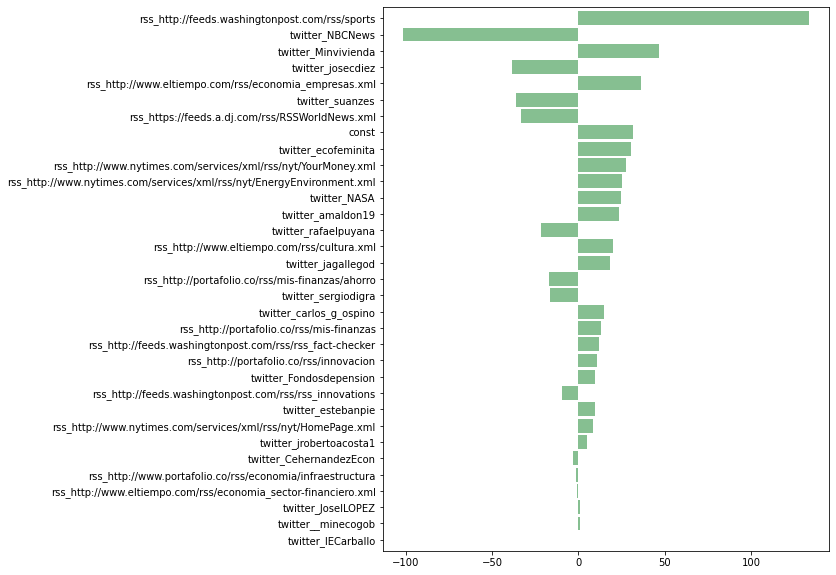

In [158]:
ax = resultados_reg['coef'].plot(kind='barh', figsize=(8, 10), color='#86bf91', zorder=2, width=0.85)

In [ ]:
## validación con otro conjunto de variables

In [71]:
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_train_f, y_train, test_size = 0.05, random_state = 86, shuffle= True)

In [72]:
X_train_lm_r = sm.add_constant(X_train_r)
lr_1_r = sm.OLS(y_train_r, X_train_lm_r).fit()
lr_1_r.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Diferencia   R-squared:                       0.770
Model:                            OLS   Adj. R-squared:                  0.546
Method:                 Least Squares   F-statistic:                     3.446
Date:                Fri, 22 Apr 2022   Prob (F-statistic):           0.000326
Time:                        18:01:49   Log-Likelihood:                -269.91
No. Observations:                  66   AIC:                             605.8
Df Residuals:                      33   BIC:                             678.1
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
=========================================================================================================================================
                                                                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------
const                                                                    31.4191     21.277      1.477      0.149     -11.869      74.707
rss_http://feeds.washingtonpost.com/rss/sports                          133.5241     89.081      1.499      0.143     -47.713     314.761
rss_http://www.eltiempo.com/rss/cultura.xml                              20.1439     26.334      0.765      0.450     -33.432      73.720
rss_http://www.eltiempo.com/rss/economia_sector-financiero.xml           -1.1065     11.279     -0.098      0.922     -24.053      21.840
rss_http://feeds.washingtonpost.com/rss/rss_fact-checker                 12.0344     16.870      0.713      0.481     -22.288      46.357
rss_http://portafolio.co/rss/mis-finanzas                                12.9436      8.966      1.444      0.158      -5.297      31.184
rss_http://www.eltiempo.com/rss/economia_empresas.xml                    36.4142     12.436      2.928      0.006      11.113      61.716
rss_http://feeds.washingtonpost.com/rss/rss_innovations                  -9.4395     17.192     -0.549      0.587     -44.416      25.537
rss_http://www.nytimes.com/services/xml/rss/nyt/HomePage.xml              8.3992     16.143      0.520      0.606     -24.445      41.243
rss_http://www.nytimes.com/services/xml/rss/nyt/YourMoney.xml            27.5469     12.710      2.167      0.038       1.689      53.405
rss_http://portafolio.co/rss/mis-finanzas/ahorro                        -17.2589     15.553     -1.110      0.275     -48.901      14.383
rss_http://portafolio.co/rss/innovacion                                  10.8025     12.683      0.852      0.400     -15.000      36.605
rss_http://www.nytimes.com/services/xml/rss/nyt/EnergyEnvironment.xml    25.0757     10.747      2.333      0.026       3.210      46.941
twitter_Fondosdepension                                                   9.8079     15.701      0.625      0.536     -22.137      41.752
twitter_JoseILOPEZ                                                        1.0202      9.730      0.105      0.917     -18.776      20.816
twitter_IECarballo                                                       -0.2452     15.843     -0.015      0.988     -32.478      31.988
rss_https://feeds.a.dj.com/rss/RSSWorldNews.xml                         -33.3898     16.290     -2.050      0.048     -66.531      -0.248
twitter_CehernandezEcon                                                  -2.9097      9.643     -0.302      0.765     -22.528      16.709
rss_http://www.portafolio.co/rss/economia/infraestructura                -1.3909     11.248     -0.124      0.902     -24.274      21.492
twitter_josecdiez                              

In [73]:
X_test_lm_r = sm.add_constant(X_test_r)
ypred = lr_1_r.predict(X_test_lm_r)
ypred

date
2022-02-23   -15.544653
2022-03-10     6.336428
2022-04-01    -2.054930
2022-03-04   -31.241176
dtype: float64

In [74]:
RMSE=mean_squared_error(y_test_r,ypred, squared=False)
RMSE2=mean_squared_error(y_test_r,ypred, squared=True)
MAPE=mean_absolute_percentage_error(y_test_r,ypred) 
print("RMSE:",RMSE," ","MAPE:",MAPE)

RMSE: 38.23616927424822   MAPE: 1.0059703130990325


### XGBOOST

In [80]:
import xgboost as xgb

In [81]:
modelo_trm=xgb.XGBRegressor(max_depth=80, verbosity= 0, subsample=0.5,  n_estimators=472, n_jobs=-1, objective='reg:squarederror', booster='gbtree', random_state=42, learning_rate=0.04, reg_lambda=1)

In [82]:
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_train_f, y_train, test_size = 0.05, random_state = 86, shuffle= True)

#### Variables finales antes final

In [83]:
modelo_trm=modelo_trm.fit(X_train_r, y_train_r, eval_set=[(X_train_r, y_train_r), (X_test_r, y_test_r)])

[0]	validation_0-rmse:30.15491	validation_1-rmse:29.28037
[1]	validation_0-rmse:29.64848	validation_1-rmse:28.89000
[2]	validation_0-rmse:29.34080	validation_1-rmse:28.26334
[3]	validation_0-rmse:28.73483	validation_1-rmse:27.53934
[4]	validation_0-rmse:28.41303	validation_1-rmse:28.15463
[5]	validation_0-rmse:28.02513	validation_1-rmse:28.09681
[6]	validation_0-rmse:27.54874	validation_1-rmse:27.85976
[7]	validation_0-rmse:27.09678	validation_1-rmse:27.73433
[8]	validation_0-rmse:26.58999	validation_1-rmse:28.53893
[9]	validation_0-rmse:26.25797	validation_1-rmse:28.54962
[10]	validation_0-rmse:25.82547	validation_1-rmse:28.54790
[11]	validation_0-rmse:25.53031	validation_1-rmse:28.90587
[12]	validation_0-rmse:25.10954	validation_1-rmse:29.02010
[13]	validation_0-rmse:24.79540	validation_1-rmse:29.25743
[14]	validation_0-rmse:24.51618	validation_1-rmse:29.74002
[15]	validation_0-rmse:24.12241	validation_1-rmse:29.55429
[16]	validation_0-rmse:23.96744	validation_1-rmse:28.84501
[17]	va

C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\xgboost\data.py:208: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[104]	validation_0-rmse:9.37826	validation_1-rmse:34.24763
[105]	validation_0-rmse:9.29518	validation_1-rmse:34.11336
[106]	validation_0-rmse:9.18842	validation_1-rmse:34.20887
[107]	validation_0-rmse:9.14329	validation_1-rmse:34.12007
[108]	validation_0-rmse:9.00693	validation_1-rmse:34.01534
[109]	validation_0-rmse:8.91566	validation_1-rmse:34.29636
[110]	validation_0-rmse:8.83777	validation_1-rmse:34.24950
[111]	validation_0-rmse:8.73441	validation_1-rmse:34.38694
[112]	validation_0-rmse:8.62626	validation_1-rmse:34.37957
[113]	validation_0-rmse:8.58054	validation_1-rmse:34.40979
[114]	validation_0-rmse:8.45069	validation_1-rmse:34.27037
[115]	validation_0-rmse:8.36835	validation_1-rmse:34.38764
[116]	validation_0-rmse:8.22472	validation_1-rmse:34.27914
[117]	validation_0-rmse:8.12085	validation_1-rmse:34.27823
[118]	validation_0-rmse:8.04195	validation_1-rmse:34.20274
[119]	validation_0-rmse:7.89746	validation_1-rmse:34.24891
[120]	validation_0-rmse:7.79334	validation_1-rmse:34.256

[243]	validation_0-rmse:2.30803	validation_1-rmse:39.73723
[244]	validation_0-rmse:2.30663	validation_1-rmse:39.73140
[245]	validation_0-rmse:2.30482	validation_1-rmse:39.69858
[246]	validation_0-rmse:2.28019	validation_1-rmse:39.74222
[247]	validation_0-rmse:2.25027	validation_1-rmse:39.78133
[248]	validation_0-rmse:2.23435	validation_1-rmse:39.85407
[249]	validation_0-rmse:2.20732	validation_1-rmse:39.93808
[250]	validation_0-rmse:2.20070	validation_1-rmse:39.92194
[251]	validation_0-rmse:2.17433	validation_1-rmse:39.92562
[252]	validation_0-rmse:2.17595	validation_1-rmse:39.89513
[253]	validation_0-rmse:2.15141	validation_1-rmse:39.96626
[254]	validation_0-rmse:2.12490	validation_1-rmse:40.04419
[255]	validation_0-rmse:2.09400	validation_1-rmse:40.12322
[256]	validation_0-rmse:2.09098	validation_1-rmse:40.12712
[257]	validation_0-rmse:2.07329	validation_1-rmse:40.10180
[258]	validation_0-rmse:2.04181	validation_1-rmse:40.18502
[259]	validation_0-rmse:2.04116	validation_1-rmse:40.243

[382]	validation_0-rmse:0.84689	validation_1-rmse:43.24444
[383]	validation_0-rmse:0.83980	validation_1-rmse:43.23505
[384]	validation_0-rmse:0.83780	validation_1-rmse:43.24213
[385]	validation_0-rmse:0.83788	validation_1-rmse:43.23828
[386]	validation_0-rmse:0.82492	validation_1-rmse:43.20405
[387]	validation_0-rmse:0.82422	validation_1-rmse:43.20046
[388]	validation_0-rmse:0.82112	validation_1-rmse:43.23397
[389]	validation_0-rmse:0.81880	validation_1-rmse:43.23432
[390]	validation_0-rmse:0.80444	validation_1-rmse:43.26823
[391]	validation_0-rmse:0.79998	validation_1-rmse:43.26666
[392]	validation_0-rmse:0.79622	validation_1-rmse:43.23660
[393]	validation_0-rmse:0.78451	validation_1-rmse:43.26951
[394]	validation_0-rmse:0.77916	validation_1-rmse:43.24081
[395]	validation_0-rmse:0.77304	validation_1-rmse:43.21127
[396]	validation_0-rmse:0.76885	validation_1-rmse:43.24538
[397]	validation_0-rmse:0.76435	validation_1-rmse:43.21575
[398]	validation_0-rmse:0.76362	validation_1-rmse:43.248

In [84]:
ypred=modelo_trm.predict(X_test_r)
ypred

array([-20.277473  ,  -0.32936284,   3.8230097 , -42.527603  ],
      dtype=float32)

In [85]:
RMSE=mean_squared_error(y_test_r,ypred, squared=False)
RMSE2=mean_squared_error(y_test_r,ypred, squared=True)
MAPE=mean_absolute_percentage_error(y_test_r,ypred) 
print("RMSE:",RMSE," ","MAPE:",MAPE)

RMSE: 43.950203967048424   MAPE: 1.0331417253752138


### Variables  final

In [138]:
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_train_cf, y_train, test_size = 0.05, random_state = 86, shuffle= True)

In [139]:
modelo_trm=xgb.XGBRegressor(max_depth=80, verbosity= 0, subsample=0.5,  n_estimators=472, n_jobs=-1, objective='reg:squarederror', booster='gbtree', random_state=42, learning_rate=0.04, reg_lambda=1)
modelo_trm=modelo_trm.fit(X_train_r, y_train_r, eval_set=[(X_train_r, y_train_r), (X_test_r, y_test_r)])

[0]	validation_0-rmse:30.16656	validation_1-rmse:29.52978
[1]	validation_0-rmse:29.70243	validation_1-rmse:29.26826
[2]	validation_0-rmse:29.40790	validation_1-rmse:28.98288
[3]	validation_0-rmse:28.78825	validation_1-rmse:28.87844
[4]	validation_0-rmse:28.44371	validation_1-rmse:29.19217
[5]	validation_0-rmse:28.11263	validation_1-rmse:29.20895
[6]	validation_0-rmse:27.62944	validation_1-rmse:29.14432
[7]	validation_0-rmse:27.19721	validation_1-rmse:29.18909
[8]	validation_0-rmse:26.62841	validation_1-rmse:29.97108
[9]	validation_0-rmse:26.26920	validation_1-rmse:29.68592
[10]	validation_0-rmse:25.81737	validation_1-rmse:30.19367
[11]	validation_0-rmse:25.49630	validation_1-rmse:30.59117
[12]	validation_0-rmse:24.97227	validation_1-rmse:30.72626
[13]	validation_0-rmse:24.73900	validation_1-rmse:30.98882
[14]	validation_0-rmse:24.47646	validation_1-rmse:30.97329
[15]	validation_0-rmse:24.04677	validation_1-rmse:31.02754
[16]	validation_0-rmse:23.86058	validation_1-rmse:30.14348
[17]	va

C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\xgboost\data.py:208: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[113]	validation_0-rmse:7.63703	validation_1-rmse:34.31827
[114]	validation_0-rmse:7.51046	validation_1-rmse:34.22890
[115]	validation_0-rmse:7.43650	validation_1-rmse:34.32484
[116]	validation_0-rmse:7.32013	validation_1-rmse:34.29454
[117]	validation_0-rmse:7.23989	validation_1-rmse:34.24181
[118]	validation_0-rmse:7.17210	validation_1-rmse:34.31334
[119]	validation_0-rmse:7.05177	validation_1-rmse:34.30561
[120]	validation_0-rmse:6.95397	validation_1-rmse:34.34223
[121]	validation_0-rmse:6.89813	validation_1-rmse:34.29780
[122]	validation_0-rmse:6.84183	validation_1-rmse:34.26951
[123]	validation_0-rmse:6.79073	validation_1-rmse:34.37248
[124]	validation_0-rmse:6.73845	validation_1-rmse:34.21416
[125]	validation_0-rmse:6.63760	validation_1-rmse:34.28984
[126]	validation_0-rmse:6.57948	validation_1-rmse:34.24777
[127]	validation_0-rmse:6.54160	validation_1-rmse:34.25376
[128]	validation_0-rmse:6.49787	validation_1-rmse:34.20741
[129]	validation_0-rmse:6.43120	validation_1-rmse:34.242

[252]	validation_0-rmse:1.81406	validation_1-rmse:35.03639
[253]	validation_0-rmse:1.80471	validation_1-rmse:35.06764
[254]	validation_0-rmse:1.79849	validation_1-rmse:35.07275
[255]	validation_0-rmse:1.77688	validation_1-rmse:35.09638
[256]	validation_0-rmse:1.75910	validation_1-rmse:35.08498
[257]	validation_0-rmse:1.73102	validation_1-rmse:35.07342
[258]	validation_0-rmse:1.70883	validation_1-rmse:35.13053
[259]	validation_0-rmse:1.69930	validation_1-rmse:35.13221
[260]	validation_0-rmse:1.67602	validation_1-rmse:35.12701
[261]	validation_0-rmse:1.64593	validation_1-rmse:35.15530
[262]	validation_0-rmse:1.64207	validation_1-rmse:35.15263
[263]	validation_0-rmse:1.62175	validation_1-rmse:35.14752
[264]	validation_0-rmse:1.60515	validation_1-rmse:35.14272
[265]	validation_0-rmse:1.59032	validation_1-rmse:35.14502
[266]	validation_0-rmse:1.56212	validation_1-rmse:35.14238
[267]	validation_0-rmse:1.54889	validation_1-rmse:35.15415
[268]	validation_0-rmse:1.53391	validation_1-rmse:35.174

[391]	validation_0-rmse:0.54884	validation_1-rmse:35.77257
[392]	validation_0-rmse:0.54719	validation_1-rmse:35.76260
[393]	validation_0-rmse:0.54250	validation_1-rmse:35.77634
[394]	validation_0-rmse:0.54046	validation_1-rmse:35.77143
[395]	validation_0-rmse:0.53487	validation_1-rmse:35.76001
[396]	validation_0-rmse:0.52763	validation_1-rmse:35.77187
[397]	validation_0-rmse:0.52633	validation_1-rmse:35.76452
[398]	validation_0-rmse:0.52301	validation_1-rmse:35.76551
[399]	validation_0-rmse:0.51708	validation_1-rmse:35.76217
[400]	validation_0-rmse:0.51004	validation_1-rmse:35.77594
[401]	validation_0-rmse:0.50504	validation_1-rmse:35.77738
[402]	validation_0-rmse:0.50121	validation_1-rmse:35.79249
[403]	validation_0-rmse:0.49967	validation_1-rmse:35.78233
[404]	validation_0-rmse:0.49792	validation_1-rmse:35.78712
[405]	validation_0-rmse:0.49779	validation_1-rmse:35.78393
[406]	validation_0-rmse:0.49685	validation_1-rmse:35.77755
[407]	validation_0-rmse:0.49667	validation_1-rmse:35.781

In [140]:
ypred=modelo_trm.predict(X_test_r)
ypred

array([ -5.0284624,   9.1764   ,  14.643444 , -29.42597  ], dtype=float32)

In [141]:
RMSE=mean_squared_error(y_test_r,ypred, squared=False)
RMSE2=mean_squared_error(y_test_r,ypred, squared=True)
MAPE=mean_absolute_percentage_error(y_test_r,ypred) 
print("RMSE:",RMSE," ","MAPE:",MAPE)

RMSE: 36.02524824955825   MAPE: 0.8935570469055798


In [142]:
#importancia de las variables

In [145]:
fs=modelo_trm.get_booster().get_fscore()
fs=pd.DataFrame.from_dict(fs, orient='index').sort_values(0,ascending=False)
fs.columns=['score']
fs

,score
rss_http://feeds.washingtonpost.com/rss/sports,1336
rss_http://portafolio.co/rss/mis-finanzas,979
twitter_Minvivienda,536
rss_http://www.eltiempo.com/rss/economia_empresas.xml,441
rss_http://www.eltiempo.com/rss/cultura.xml,430
twitter_jrobertoacosta1,405
rss_http://www.nytimes.com/services/xml/rss/nyt/EnergyEnvironment.xml,363
twitter_josecdiez,341
twitter_NASA,276
twitter_ecofeminita,252


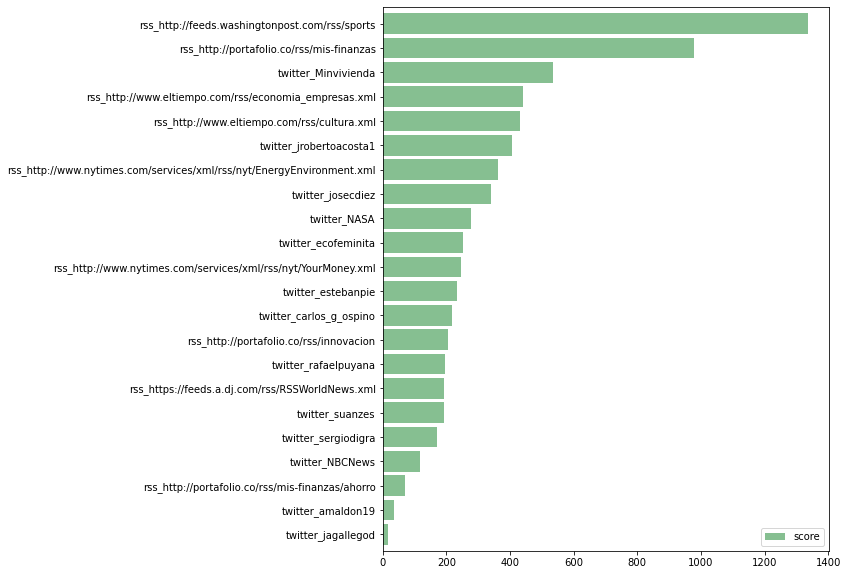

In [147]:
ax = fs.sort_values('score').plot(kind='barh', figsize=(8, 10), color='#86bf91', zorder=2, width=0.85)

In [ ]:
## Todas las variables

In [110]:
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_train, y_train, test_size = 0.05, random_state = 86, shuffle= True)

In [111]:
modelo_trm=xgb.XGBRegressor(max_depth=80, verbosity= 0, subsample=0.5,  n_estimators=472, n_jobs=-1, objective='reg:squarederror', booster='gbtree', random_state=42, learning_rate=0.04, reg_lambda=1)
modelo_trm=modelo_trm.fit(X_train_r, y_train_r, eval_set=[(X_train_r, y_train_r), (X_test_r, y_test_r)])

[0]	validation_0-rmse:30.07060	validation_1-rmse:28.97380
[1]	validation_0-rmse:29.61682	validation_1-rmse:28.85880
[2]	validation_0-rmse:29.18662	validation_1-rmse:29.16392
[3]	validation_0-rmse:28.57523	validation_1-rmse:28.96158
[4]	validation_0-rmse:28.28876	validation_1-rmse:29.04166
[5]	validation_0-rmse:27.89884	validation_1-rmse:28.28913
[6]	validation_0-rmse:27.39522	validation_1-rmse:27.94201
[7]	validation_0-rmse:26.83006	validation_1-rmse:27.89348
[8]	validation_0-rmse:26.41259	validation_1-rmse:27.99633
[9]	validation_0-rmse:26.11550	validation_1-rmse:28.85465
[10]	validation_0-rmse:25.74443	validation_1-rmse:28.73922
[11]	validation_0-rmse:25.40165	validation_1-rmse:29.34436
[12]	validation_0-rmse:24.96095	validation_1-rmse:30.01263
[13]	validation_0-rmse:24.91659	validation_1-rmse:29.95940
[14]	validation_0-rmse:24.64050	validation_1-rmse:30.57109
[15]	validation_0-rmse:24.25942	validation_1-rmse:30.81185
[16]	validation_0-rmse:23.99955	validation_1-rmse:30.16106
[17]	va

[140]	validation_0-rmse:7.07184	validation_1-rmse:43.64658
[141]	validation_0-rmse:7.03635	validation_1-rmse:43.74982
[142]	validation_0-rmse:6.98180	validation_1-rmse:43.75855
[143]	validation_0-rmse:6.84224	validation_1-rmse:43.93078
[144]	validation_0-rmse:6.75355	validation_1-rmse:43.97361
[145]	validation_0-rmse:6.71507	validation_1-rmse:44.05344
[146]	validation_0-rmse:6.58596	validation_1-rmse:44.04009
[147]	validation_0-rmse:6.54446	validation_1-rmse:44.08148
[148]	validation_0-rmse:6.52211	validation_1-rmse:44.11278
[149]	validation_0-rmse:6.49156	validation_1-rmse:44.11438
[150]	validation_0-rmse:6.37918	validation_1-rmse:44.09217
[151]	validation_0-rmse:6.35482	validation_1-rmse:44.07108
[152]	validation_0-rmse:6.29935	validation_1-rmse:44.04532
[153]	validation_0-rmse:6.20311	validation_1-rmse:44.10059
[154]	validation_0-rmse:6.10832	validation_1-rmse:44.14994
[155]	validation_0-rmse:6.07984	validation_1-rmse:44.13722
[156]	validation_0-rmse:6.05686	validation_1-rmse:44.129

[279]	validation_0-rmse:2.16969	validation_1-rmse:48.10670
[280]	validation_0-rmse:2.16421	validation_1-rmse:48.11892
[281]	validation_0-rmse:2.16711	validation_1-rmse:48.12487
[282]	validation_0-rmse:2.16727	validation_1-rmse:48.08086
[283]	validation_0-rmse:2.14150	validation_1-rmse:48.10668
[284]	validation_0-rmse:2.12879	validation_1-rmse:48.11155
[285]	validation_0-rmse:2.12992	validation_1-rmse:48.10909
[286]	validation_0-rmse:2.10160	validation_1-rmse:48.18393
[287]	validation_0-rmse:2.07682	validation_1-rmse:48.13868
[288]	validation_0-rmse:2.04058	validation_1-rmse:48.22078
[289]	validation_0-rmse:2.03605	validation_1-rmse:48.22757
[290]	validation_0-rmse:2.00008	validation_1-rmse:48.28961
[291]	validation_0-rmse:1.98404	validation_1-rmse:48.36250
[292]	validation_0-rmse:1.97653	validation_1-rmse:48.36832
[293]	validation_0-rmse:1.97867	validation_1-rmse:48.37895
[294]	validation_0-rmse:1.97860	validation_1-rmse:48.38824
[295]	validation_0-rmse:1.98052	validation_1-rmse:48.365

[418]	validation_0-rmse:0.85794	validation_1-rmse:51.01365
[419]	validation_0-rmse:0.85312	validation_1-rmse:51.04977
[420]	validation_0-rmse:0.84938	validation_1-rmse:51.01916
[421]	validation_0-rmse:0.84652	validation_1-rmse:51.05433
[422]	validation_0-rmse:0.83181	validation_1-rmse:51.09105
[423]	validation_0-rmse:0.81933	validation_1-rmse:51.09252
[424]	validation_0-rmse:0.80600	validation_1-rmse:51.12658
[425]	validation_0-rmse:0.80392	validation_1-rmse:51.15877
[426]	validation_0-rmse:0.78910	validation_1-rmse:51.19237
[427]	validation_0-rmse:0.78700	validation_1-rmse:51.16679
[428]	validation_0-rmse:0.77296	validation_1-rmse:51.19887
[429]	validation_0-rmse:0.77109	validation_1-rmse:51.23037
[430]	validation_0-rmse:0.76846	validation_1-rmse:51.23160
[431]	validation_0-rmse:0.76627	validation_1-rmse:51.26211
[432]	validation_0-rmse:0.76440	validation_1-rmse:51.29249
[433]	validation_0-rmse:0.76329	validation_1-rmse:51.30064
[434]	validation_0-rmse:0.75632	validation_1-rmse:51.272

In [112]:
ypred=modelo_trm.predict(X_test_r)
ypred

array([-12.249552, -10.30326 ,  -8.46693 , -51.342884], dtype=float32)

In [113]:
RMSE=mean_squared_error(y_test_r,ypred, squared=False)
RMSE2=mean_squared_error(y_test_r,ypred, squared=True)
MAPE=mean_absolute_percentage_error(y_test_r,ypred) 
print("RMSE:",RMSE," ","MAPE:",MAPE)

RMSE: 51.504028263754485   MAPE: 1.3871547054286157


In [114]:
fs=modelo_trm.get_booster().get_fscore()
#fs

In [115]:
type(fs)

dict

In [116]:
fs=pd.DataFrame.from_dict(fs, orient='index').sort_values(0,ascending=False)
fs

,0
rss_http://elnacional.com.do/feed/,1039
rss_http://ep00.epimg.net/rss/economia/portada.xml,367
rss_http://feeds.nytimes.com/nyt/rss/Technology,317
rss_http://portafolio.co/rss/mis-finanzas,294
rss_http://feeds.washingtonpost.com/rss/national/energy-environment,256
...,...
rss_http://www.portafolio.co/rss/economia/finanzas,1
twitter_PublimetroCol,1
twitter_amaldon19,1
twitter_ELTIEMPO,1


In [117]:
fs.describe()

,0
count,159.000000
mean,40.025157
std,97.698124
min,1.000000
25%,7.000000
50%,16.000000
75%,34.500000
max,1039.000000


In [118]:
fs.head(20)

,0
rss_http://elnacional.com.do/feed/,1039
rss_http://ep00.epimg.net/rss/economia/portada.xml,367
rss_http://feeds.nytimes.com/nyt/rss/Technology,317
rss_http://portafolio.co/rss/mis-finanzas,294
rss_http://feeds.washingtonpost.com/rss/national/energy-environment,256
rss_http://ep00.epimg.net/rss/tags/ultimas_noticias.xml,241
rss_http://feeds.nytimes.com/nyt/rss/Business,206
rss_http://www.nytimes.com/services/xml/rss/nyt/HomePage.xml,179
twitter_BvcColombia,153
rss_http://feeds.washingtonpost.com/rss/politics,102


In [119]:
seleccionColumnas_xgb=fs.head(30).index.values

In [120]:
seleccionColumnas_xgb

array(['rss_http://elnacional.com.do/feed/',
       'rss_http://ep00.epimg.net/rss/economia/portada.xml',
       'rss_http://feeds.nytimes.com/nyt/rss/Technology',
       'rss_http://portafolio.co/rss/mis-finanzas',
       'rss_http://feeds.washingtonpost.com/rss/national/energy-environment',
       'rss_http://ep00.epimg.net/rss/tags/ultimas_noticias.xml',
       'rss_http://feeds.nytimes.com/nyt/rss/Business',
       'rss_http://www.nytimes.com/services/xml/rss/nyt/HomePage.xml',
       'twitter_BvcColombia',
       'rss_http://feeds.washingtonpost.com/rss/politics',
       'rss_http://www.nytimes.com/services/xml/rss/nyt/EnergyEnvironment.xml',
       'rss_http://rssfeeds.usatoday.com/usatoday-NewsTopStories',
       'rss_http://portafolio.co/rss/innovacion',
       'twitter_Fondosdepension', 'twitter_Cesaretamayo',
       'rss_http://www.eltiempo.com/rss/economia_empresas.xml',
       'twitter_carlos_g_ospino', 'twitter_Minvivienda',
       'twitter_josecdiez',
       'rss_http://w

In [121]:
### modelo con variables seleccionadas

In [122]:
X_train_cf_xgb=X_train[seleccionColumnas_xgb]

In [123]:
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_train_cf_xgb, y_train, test_size = 0.05, random_state = 86, shuffle= True)

In [124]:
modelo_trm_xgb=xgb.XGBRegressor(max_depth=80, verbosity= 0, subsample=0.5,  n_estimators=472, n_jobs=-1, objective='reg:squarederror', booster='gbtree', random_state=42, learning_rate=0.04, reg_lambda=1)
modelo_trm_xgb=modelo_trm.fit(X_train_r, y_train_r, eval_set=[(X_train_r, y_train_r), (X_test_r, y_test_r)])

[0]	validation_0-rmse:30.16198	validation_1-rmse:29.85541
[1]	validation_0-rmse:29.69095	validation_1-rmse:29.85522
[2]	validation_0-rmse:29.43397	validation_1-rmse:30.92997
[3]	validation_0-rmse:28.83585	validation_1-rmse:31.15696
[4]	validation_0-rmse:28.54564	validation_1-rmse:30.95839
[5]	validation_0-rmse:28.04652	validation_1-rmse:31.20718
[6]	validation_0-rmse:27.56507	validation_1-rmse:31.38188
[7]	validation_0-rmse:27.02991	validation_1-rmse:31.32588
[8]	validation_0-rmse:26.46864	validation_1-rmse:32.20237
[9]	validation_0-rmse:26.03855	validation_1-rmse:32.07296
[10]	validation_0-rmse:25.68879	validation_1-rmse:32.33691
[11]	validation_0-rmse:25.32904	validation_1-rmse:32.18059
[12]	validation_0-rmse:24.90514	validation_1-rmse:32.65411
[13]	validation_0-rmse:24.85350	validation_1-rmse:32.58628
[14]	validation_0-rmse:24.65414	validation_1-rmse:32.67221
[15]	validation_0-rmse:24.27093	validation_1-rmse:32.68889
[16]	validation_0-rmse:24.08193	validation_1-rmse:32.89341
[17]	va

C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\xgboost\data.py:208: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[38]	validation_0-rmse:18.65141	validation_1-rmse:35.75915
[39]	validation_0-rmse:18.41675	validation_1-rmse:35.71130
[40]	validation_0-rmse:18.19024	validation_1-rmse:35.68902
[41]	validation_0-rmse:17.99701	validation_1-rmse:35.98775
[42]	validation_0-rmse:17.84628	validation_1-rmse:35.97680
[43]	validation_0-rmse:17.73559	validation_1-rmse:36.23795
[44]	validation_0-rmse:17.59387	validation_1-rmse:36.17591
[45]	validation_0-rmse:17.34466	validation_1-rmse:36.36534
[46]	validation_0-rmse:17.12410	validation_1-rmse:36.52528
[47]	validation_0-rmse:16.93642	validation_1-rmse:36.79454
[48]	validation_0-rmse:16.74888	validation_1-rmse:36.97492
[49]	validation_0-rmse:16.46247	validation_1-rmse:36.83862
[50]	validation_0-rmse:16.25021	validation_1-rmse:36.75949
[51]	validation_0-rmse:16.09263	validation_1-rmse:36.64033
[52]	validation_0-rmse:15.80812	validation_1-rmse:36.77118
[53]	validation_0-rmse:15.55172	validation_1-rmse:36.76387
[54]	validation_0-rmse:15.36232	validation_1-rmse:37.014

[177]	validation_0-rmse:4.77053	validation_1-rmse:42.95781
[178]	validation_0-rmse:4.70090	validation_1-rmse:43.08960
[179]	validation_0-rmse:4.64005	validation_1-rmse:43.16648
[180]	validation_0-rmse:4.63452	validation_1-rmse:43.18121
[181]	validation_0-rmse:4.62117	validation_1-rmse:43.25740
[182]	validation_0-rmse:4.55358	validation_1-rmse:43.40000
[183]	validation_0-rmse:4.51039	validation_1-rmse:43.40292
[184]	validation_0-rmse:4.49535	validation_1-rmse:43.47414
[185]	validation_0-rmse:4.41620	validation_1-rmse:43.61627
[186]	validation_0-rmse:4.35925	validation_1-rmse:43.67829
[187]	validation_0-rmse:4.28674	validation_1-rmse:43.75404
[188]	validation_0-rmse:4.27243	validation_1-rmse:43.73829
[189]	validation_0-rmse:4.25381	validation_1-rmse:43.80553
[190]	validation_0-rmse:4.22345	validation_1-rmse:43.77242
[191]	validation_0-rmse:4.14446	validation_1-rmse:43.87634
[192]	validation_0-rmse:4.06596	validation_1-rmse:43.92669
[193]	validation_0-rmse:3.99646	validation_1-rmse:44.019

[316]	validation_0-rmse:1.61260	validation_1-rmse:48.58026
[317]	validation_0-rmse:1.59041	validation_1-rmse:48.65968
[318]	validation_0-rmse:1.57476	validation_1-rmse:48.72752
[319]	validation_0-rmse:1.55828	validation_1-rmse:48.71338
[320]	validation_0-rmse:1.55991	validation_1-rmse:48.69239
[321]	validation_0-rmse:1.54604	validation_1-rmse:48.78159
[322]	validation_0-rmse:1.53875	validation_1-rmse:48.78059
[323]	validation_0-rmse:1.54027	validation_1-rmse:48.78457
[324]	validation_0-rmse:1.53234	validation_1-rmse:48.87330
[325]	validation_0-rmse:1.51169	validation_1-rmse:48.94873
[326]	validation_0-rmse:1.48154	validation_1-rmse:49.02827
[327]	validation_0-rmse:1.46863	validation_1-rmse:49.10040
[328]	validation_0-rmse:1.46560	validation_1-rmse:49.09743
[329]	validation_0-rmse:1.46611	validation_1-rmse:49.09000
[330]	validation_0-rmse:1.46327	validation_1-rmse:49.08714
[331]	validation_0-rmse:1.44049	validation_1-rmse:49.15729
[332]	validation_0-rmse:1.43567	validation_1-rmse:49.171

[455]	validation_0-rmse:0.62328	validation_1-rmse:51.63119
[456]	validation_0-rmse:0.62236	validation_1-rmse:51.63125
[457]	validation_0-rmse:0.61093	validation_1-rmse:51.65940
[458]	validation_0-rmse:0.60951	validation_1-rmse:51.69033
[459]	validation_0-rmse:0.60520	validation_1-rmse:51.69266
[460]	validation_0-rmse:0.60083	validation_1-rmse:51.69746
[461]	validation_0-rmse:0.59588	validation_1-rmse:51.69833
[462]	validation_0-rmse:0.58490	validation_1-rmse:51.72867
[463]	validation_0-rmse:0.57946	validation_1-rmse:51.73081
[464]	validation_0-rmse:0.57867	validation_1-rmse:51.75817
[465]	validation_0-rmse:0.57921	validation_1-rmse:51.76310
[466]	validation_0-rmse:0.56834	validation_1-rmse:51.78940
[467]	validation_0-rmse:0.56847	validation_1-rmse:51.79063
[468]	validation_0-rmse:0.56736	validation_1-rmse:51.81656
[469]	validation_0-rmse:0.56245	validation_1-rmse:51.81881
[470]	validation_0-rmse:0.55383	validation_1-rmse:51.81862
[471]	validation_0-rmse:0.54270	validation_1-rmse:51.843

In [125]:
ypred=modelo_trm_xgb.predict(X_test_r)
ypred

array([-29.709398, -14.452875,  -9.592235, -48.758728], dtype=float32)

In [126]:
RMSE=mean_squared_error(y_test_r,ypred, squared=False)
RMSE2=mean_squared_error(y_test_r,ypred, squared=True)
MAPE=mean_absolute_percentage_error(y_test_r,ypred) 
print("RMSE:",RMSE," ","MAPE:",MAPE)

RMSE: 51.84331077217305   MAPE: 1.4732160127545484


In [127]:
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_train_f, y_train, test_size = 0.05, random_state = 86, shuffle= True)

In [128]:
modelo_trm_xgb=xgb.XGBRegressor(max_depth=80, verbosity= 0, subsample=0.5,  n_estimators=472, n_jobs=-1, objective='reg:squarederror', booster='gbtree', random_state=42, learning_rate=0.04, reg_lambda=1)
modelo_trm_xgb=modelo_trm.fit(X_train_r, y_train_r, eval_set=[(X_train_r, y_train_r), (X_test_r, y_test_r)])

[0]	validation_0-rmse:30.15491	validation_1-rmse:29.28037
[1]	validation_0-rmse:29.64848	validation_1-rmse:28.89000
[2]	validation_0-rmse:29.34080	validation_1-rmse:28.26334
[3]	validation_0-rmse:28.73483	validation_1-rmse:27.53934
[4]	validation_0-rmse:28.41303	validation_1-rmse:28.15463
[5]	validation_0-rmse:28.02513	validation_1-rmse:28.09681
[6]	validation_0-rmse:27.54874	validation_1-rmse:27.85976
[7]	validation_0-rmse:27.09678	validation_1-rmse:27.73433
[8]	validation_0-rmse:26.58999	validation_1-rmse:28.53893
[9]	validation_0-rmse:26.25797	validation_1-rmse:28.54962
[10]	validation_0-rmse:25.82547	validation_1-rmse:28.54790
[11]	validation_0-rmse:25.53031	validation_1-rmse:28.90587
[12]	validation_0-rmse:25.10954	validation_1-rmse:29.02010
[13]	validation_0-rmse:24.79540	validation_1-rmse:29.25743
[14]	validation_0-rmse:24.51618	validation_1-rmse:29.74002
[15]	validation_0-rmse:24.12241	validation_1-rmse:29.55429
[16]	validation_0-rmse:23.96744	validation_1-rmse:28.84501
[17]	va

C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\xgboost\data.py:208: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[107]	validation_0-rmse:9.14329	validation_1-rmse:34.12007
[108]	validation_0-rmse:9.00693	validation_1-rmse:34.01534
[109]	validation_0-rmse:8.91566	validation_1-rmse:34.29636
[110]	validation_0-rmse:8.83777	validation_1-rmse:34.24950
[111]	validation_0-rmse:8.73441	validation_1-rmse:34.38694
[112]	validation_0-rmse:8.62626	validation_1-rmse:34.37957
[113]	validation_0-rmse:8.58054	validation_1-rmse:34.40979
[114]	validation_0-rmse:8.45069	validation_1-rmse:34.27037
[115]	validation_0-rmse:8.36835	validation_1-rmse:34.38764
[116]	validation_0-rmse:8.22472	validation_1-rmse:34.27914
[117]	validation_0-rmse:8.12085	validation_1-rmse:34.27823
[118]	validation_0-rmse:8.04195	validation_1-rmse:34.20274
[119]	validation_0-rmse:7.89746	validation_1-rmse:34.24891
[120]	validation_0-rmse:7.79334	validation_1-rmse:34.25664
[121]	validation_0-rmse:7.70704	validation_1-rmse:34.25191
[122]	validation_0-rmse:7.68039	validation_1-rmse:34.23743
[123]	validation_0-rmse:7.59277	validation_1-rmse:34.306

[246]	validation_0-rmse:2.28019	validation_1-rmse:39.74222
[247]	validation_0-rmse:2.25027	validation_1-rmse:39.78133
[248]	validation_0-rmse:2.23435	validation_1-rmse:39.85407
[249]	validation_0-rmse:2.20732	validation_1-rmse:39.93808
[250]	validation_0-rmse:2.20070	validation_1-rmse:39.92194
[251]	validation_0-rmse:2.17433	validation_1-rmse:39.92562
[252]	validation_0-rmse:2.17595	validation_1-rmse:39.89513
[253]	validation_0-rmse:2.15141	validation_1-rmse:39.96626
[254]	validation_0-rmse:2.12490	validation_1-rmse:40.04419
[255]	validation_0-rmse:2.09400	validation_1-rmse:40.12322
[256]	validation_0-rmse:2.09098	validation_1-rmse:40.12712
[257]	validation_0-rmse:2.07329	validation_1-rmse:40.10180
[258]	validation_0-rmse:2.04181	validation_1-rmse:40.18502
[259]	validation_0-rmse:2.04116	validation_1-rmse:40.24300
[260]	validation_0-rmse:2.03216	validation_1-rmse:40.22387
[261]	validation_0-rmse:1.99670	validation_1-rmse:40.30984
[262]	validation_0-rmse:1.98310	validation_1-rmse:40.308

[385]	validation_0-rmse:0.83788	validation_1-rmse:43.23828
[386]	validation_0-rmse:0.82492	validation_1-rmse:43.20405
[387]	validation_0-rmse:0.82422	validation_1-rmse:43.20046
[388]	validation_0-rmse:0.82112	validation_1-rmse:43.23397
[389]	validation_0-rmse:0.81880	validation_1-rmse:43.23432
[390]	validation_0-rmse:0.80444	validation_1-rmse:43.26823
[391]	validation_0-rmse:0.79998	validation_1-rmse:43.26666
[392]	validation_0-rmse:0.79622	validation_1-rmse:43.23660
[393]	validation_0-rmse:0.78451	validation_1-rmse:43.26951
[394]	validation_0-rmse:0.77916	validation_1-rmse:43.24081
[395]	validation_0-rmse:0.77304	validation_1-rmse:43.21127
[396]	validation_0-rmse:0.76885	validation_1-rmse:43.24538
[397]	validation_0-rmse:0.76435	validation_1-rmse:43.21575
[398]	validation_0-rmse:0.76362	validation_1-rmse:43.24899
[399]	validation_0-rmse:0.76075	validation_1-rmse:43.24829
[400]	validation_0-rmse:0.74920	validation_1-rmse:43.27887
[401]	validation_0-rmse:0.74432	validation_1-rmse:43.276

In [129]:
ypred=modelo_trm_xgb.predict(X_test_r)
ypred

array([-20.277473  ,  -0.32936284,   3.8230097 , -42.527603  ],
      dtype=float32)

In [130]:
RMSE=mean_squared_error(y_test_r,ypred, squared=False)
RMSE2=mean_squared_error(y_test_r,ypred, squared=True)
MAPE=mean_absolute_percentage_error(y_test_r,ypred) 
print("RMSE:",RMSE," ","MAPE:",MAPE)

RMSE: 43.950203967048424   MAPE: 1.0331417253752138


# LGBM

In [205]:
from lightgbm import LGBMRegressor

In [206]:
#codificacion columnas

In [207]:
maestro_columnas=pd.DataFrame(X_train_cf.columns.values).reset_index()
maestro_columnas.columns=['cod','id']
maestro_columnas['cod']='cod_'+maestro_columnas['cod'].astype(str)
maestro_columnas

,cod,id
0,cod_0,rss_http://feeds.washingtonpost.com/rss/sports
1,cod_1,rss_http://www.eltiempo.com/rss/cultura.xml
2,cod_2,rss_http://portafolio.co/rss/mis-finanzas
3,cod_3,rss_http://www.eltiempo.com/rss/economia_empre...
4,cod_4,rss_http://www.nytimes.com/services/xml/rss/ny...
5,cod_5,rss_http://portafolio.co/rss/mis-finanzas/ahorro
6,cod_6,rss_http://portafolio.co/rss/innovacion
7,cod_7,rss_http://www.nytimes.com/services/xml/rss/ny...
8,cod_8,rss_https://feeds.a.dj.com/rss/RSSWorldNews.xml
9,cod_9,twitter_josecdiez


In [208]:
X_train_cf_lgbm=X_train_cf.copy()
X_train_cf_lgbm.columns=maestro_columnas['cod'].values
X_train_cf_lgbm

,cod_0,cod_1,cod_2,cod_3,cod_4,cod_5,cod_6,cod_7,cod_8,cod_9,...,cod_12,cod_13,cod_14,cod_15,cod_16,cod_17,cod_18,cod_19,cod_20,cod_21
date,,,,,,,,,,,,,,,,,,,,,
2021-12-30,0.000000,0.00000,-0.978893,0.000000,-0.519000,0.0,0.00000,-0.061850,0.000000,0.000000,...,-0.952593,0.000000,0.000000,-0.545167,-0.300667,0.000,0.000000,-0.799667,0.043000,-0.999
2022-01-03,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,-0.887500,0.000000,-0.948,0.000000,-0.707000,0.000000,0.411
2022-01-04,0.000000,0.00000,-0.270171,0.000000,0.000000,0.0,0.00000,-0.431000,0.000000,0.000000,...,-0.435333,0.375633,0.000000,-0.443800,-0.859833,0.000,0.000000,0.000000,0.000000,0.000
2022-01-05,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.00000,-0.836000,0.000000,0.000000,...,-0.955000,0.378744,0.000000,-0.999000,-0.622688,0.000,0.000000,-0.962000,0.000000,0.000
2022-01-06,0.000000,0.00000,-0.958863,0.000000,0.000000,0.0,0.00000,-0.362025,0.000000,0.000000,...,-0.510859,0.224650,-0.276211,-0.964000,0.153000,0.000,0.000000,0.000000,0.000000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-07,0.085076,-0.37040,0.667000,-0.501000,0.000000,0.0,0.00000,0.153000,-0.360300,-0.975375,...,-0.747385,0.431750,0.000000,0.000000,-0.245333,0.000,0.000000,-0.303333,0.000000,0.000
2022-04-08,0.111993,-0.37880,-0.212500,-0.584714,0.706500,0.0,0.14200,-0.296000,-0.739300,-0.731162,...,-0.362231,0.215000,0.000000,-0.707583,0.053667,0.000,-0.123333,-0.518200,-0.156889,0.000
2022-04-11,0.113954,-0.33390,-0.658500,-0.549000,0.848000,0.0,-0.85200,-0.005333,0.174250,-0.288438,...,-0.427200,0.018500,0.000000,-0.624143,0.000000,0.000,0.000000,-0.158000,0.000000,0.000


In [209]:
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_train_cf_lgbm, y_train, test_size = 0.05, random_state = 86, shuffle= True)

In [210]:
modeloLgbm_trm=LGBMRegressor(metric='rmse')

In [211]:
modeloLgbm_trm=modeloLgbm_trm.fit(X_train_r, y_train_r, eval_set=[(X_train_r, y_train_r), (X_test_r, y_test_r)])

[1]	training's rmse: 29.8567	valid_1's rmse: 33.8994
[2]	training's rmse: 29.5507	valid_1's rmse: 34.5577
[3]	training's rmse: 29.3452	valid_1's rmse: 35.3173
[4]	training's rmse: 28.9683	valid_1's rmse: 34.7519
[5]	training's rmse: 28.7338	valid_1's rmse: 35.3366
[6]	training's rmse: 28.5637	valid_1's rmse: 36.0237
[7]	training's rmse: 28.2606	valid_1's rmse: 35.5323
[8]	training's rmse: 28.1203	valid_1's rmse: 36.1558
[9]	training's rmse: 27.9299	valid_1's rmse: 36.6676
[10]	training's rmse: 27.6688	valid_1's rmse: 36.5543
[11]	training's rmse: 27.5506	valid_1's rmse: 37.125
[12]	training's rmse: 27.2231	valid_1's rmse: 36.9636
[13]	training's rmse: 26.9913	valid_1's rmse: 37.2086
[14]	training's rmse: 26.88	valid_1's rmse: 37.2379
[15]	training's rmse: 26.6792	valid_1's rmse: 37.1275
[16]	training's rmse: 26.4196	valid_1's rmse: 37.0159
[17]	training's rmse: 26.3245	valid_1's rmse: 37.5121
[18]	training's rmse: 26.232	valid_1's rmse: 37.5559
[19]	training's rmse: 26.0616	valid_1's r

In [212]:
modeloLgbm_trm.score(X_train_r, y_train_r)

0.5450923719732839

In [213]:
ypred=modeloLgbm_trm.predict(X_test_r)
ypred

array([ -7.72130994,  -1.03955657, -11.58541364, -22.1114174 ])

In [214]:
RMSE=mean_squared_error(y_test_r,ypred, squared=False)
RMSE2=mean_squared_error(y_test_r,ypred, squared=True)
MAPE=mean_absolute_percentage_error(y_test_r,ypred) 
print("RMSE:",RMSE," ","MAPE:",MAPE)

RMSE: 38.32527335661788   MAPE: 1.2182066015053958


In [239]:
# Seleccionado

In [274]:
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_train_cf_lgbm, y_train, test_size = 0.05, random_state = 86, shuffle= True)

In [286]:
X_train_cf_lgbm

,cod_0,cod_1,cod_2,cod_3,cod_4,cod_5,cod_6,cod_7,cod_8,cod_9,...,cod_12,cod_13,cod_14,cod_15,cod_16,cod_17,cod_18,cod_19,cod_20,cod_21
date,,,,,,,,,,,,,,,,,,,,,
2021-12-30,0.000000,0.00000,-0.978893,0.000000,-0.519000,0.0,0.00000,-0.061850,0.000000,0.000000,...,-0.952593,0.000000,0.000000,-0.545167,-0.300667,0.000,0.000000,-0.799667,0.043000,-0.999
2022-01-03,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,-0.887500,0.000000,-0.948,0.000000,-0.707000,0.000000,0.411
2022-01-04,0.000000,0.00000,-0.270171,0.000000,0.000000,0.0,0.00000,-0.431000,0.000000,0.000000,...,-0.435333,0.375633,0.000000,-0.443800,-0.859833,0.000,0.000000,0.000000,0.000000,0.000
2022-01-05,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.00000,-0.836000,0.000000,0.000000,...,-0.955000,0.378744,0.000000,-0.999000,-0.622688,0.000,0.000000,-0.962000,0.000000,0.000
2022-01-06,0.000000,0.00000,-0.958863,0.000000,0.000000,0.0,0.00000,-0.362025,0.000000,0.000000,...,-0.510859,0.224650,-0.276211,-0.964000,0.153000,0.000,0.000000,0.000000,0.000000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-07,0.085076,-0.37040,0.667000,-0.501000,0.000000,0.0,0.00000,0.153000,-0.360300,-0.975375,...,-0.747385,0.431750,0.000000,0.000000,-0.245333,0.000,0.000000,-0.303333,0.000000,0.000
2022-04-08,0.111993,-0.37880,-0.212500,-0.584714,0.706500,0.0,0.14200,-0.296000,-0.739300,-0.731162,...,-0.362231,0.215000,0.000000,-0.707583,0.053667,0.000,-0.123333,-0.518200,-0.156889,0.000
2022-04-11,0.113954,-0.33390,-0.658500,-0.549000,0.848000,0.0,-0.85200,-0.005333,0.174250,-0.288438,...,-0.427200,0.018500,0.000000,-0.624143,0.000000,0.000,0.000000,-0.158000,0.000000,0.000


In [275]:
modeloLgbm_trm=LGBMRegressor(boosting_type='gbdt', objective='regression', num_leaves=1200,
                                learning_rate=0.17, n_estimators=100, max_depth=80,
                                metric='rmse', bagging_fraction=0.8, feature_fraction=0.8, reg_lambda=0.9)

In [276]:
modeloLgbm_trm=modeloLgbm_trm.fit(X_train_r, y_train_r, eval_set=[(X_train_r, y_train_r), (X_test_r, y_test_r)])

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[1]	training's rmse: 29.7068	valid_1's rmse: 34.4508
[2]	training's rmse: 29.2197	valid_1's rmse: 35.5292
[3]	training's rmse: 28.6442	valid_1's rmse: 34.6169
[4]	training's rmse: 28.351	valid_1's rmse: 35.7997
[5]	training's rmse: 28.0238	valid_1's rmse: 36.6863
[6]	training's rmse: 27.6121	valid_1's rmse: 36.4889
[7]	training's rmse: 27.3978	valid_1's rmse: 37.496
[8]	training's rmse: 27.2387	valid_1's rmse: 37.1453
[9]	training's rmse: 26.757	valid_1's rmse: 36.925
[10]	training's rmse: 26.5776	valid_1's rmse: 37.0119
[11]	training's rmse: 26.287	valid_1's rmse: 36.8488
[12]	training's rmse: 26.131	valid_1's rmse: 37.6855
[13]	training's rmse: 25.8427	valid_1's rmse: 37.9941
[14]	training's rmse: 25.6907	valid_1's rmse: 37.1002
[15]	training's rm

In [277]:
ypred=modeloLgbm_trm.predict(X_test_r)
ypred

array([-11.48247001,   2.92297669,  -5.72255229, -18.03315828])

In [278]:
RMSE=mean_squared_error(y_test_r,ypred, squared=False)
RMSE2=mean_squared_error(y_test_r,ypred, squared=True)
MAPE=mean_absolute_percentage_error(y_test_r,ypred) 
print("RMSE:",RMSE," ","MAPE:",MAPE)

RMSE: 34.40984261837907   MAPE: 1.0348254687167884


In [279]:
modeloLgbm_trm.feature_importances_

array([10,  9,  9, 19,  2,  0,  0,  8, 10,  1, 10, 15,  7, 10, 14,  5, 16,
        0,  0, 16,  2,  0])

In [280]:
len(modeloLgbm_trm.feature_importances_)

22

In [281]:
pd.DataFrame(X_train_cf_lgbm.columns.values, columns=['cod'])

,cod
0,cod_0
1,cod_1
2,cod_2
3,cod_3
4,cod_4
5,cod_5
6,cod_6
7,cod_7
8,cod_8
9,cod_9


In [282]:
maestro_columnas_t

,cod,id,score
0,cod_0,rss_http://elnacional.com.do/feed/,0
1,cod_1,rss_http://ep00.epimg.net/rss/economia/portada...,0
2,cod_2,rss_http://ep00.epimg.net/rss/tags/ultimas_not...,0
3,cod_3,rss_http://feeds.nytimes.com/nyt/rss/Business,0
4,cod_4,rss_http://feeds.nytimes.com/nyt/rss/Technology,0
...,...,...,...
158,cod_158,twitter_rcnradio,0
159,cod_159,twitter_rodriguezbraun,0
160,cod_160,twitter_sergiodigra,6
161,cod_161,twitter_suanzes,0


In [283]:
maestro_cf_lgbm=pd.DataFrame(X_train_cf_lgbm.columns.values, columns=['cod']).merge(maestro_columnas_t[['cod','id']], on=['cod'],how='left')

In [260]:
maestro_cf_lgbm=pd.DataFrame(X_train_cf_lgbm.columns.values).reset_index()
maestro_cf_lgbm.columns=['cod','id']
maestro_cf_lgbm['cod']='cod_'+maestro_cf_lgbm['cod'].astype(str)
maestro_cf_lgbm

,cod,id
0,cod_0,cod_0
1,cod_1,cod_1
2,cod_2,cod_2
3,cod_3,cod_3
4,cod_4,cod_4
5,cod_5,cod_5
6,cod_6,cod_6
7,cod_7,cod_7
8,cod_8,cod_8
9,cod_9,cod_9


In [284]:
maestro_cf_lgbm['score']=modeloLgbm_trm.feature_importances_

In [285]:
maestro_cf_lgbm.sort_values('score', ascending=False)

,cod,id,score
3,cod_3,rss_http://feeds.nytimes.com/nyt/rss/Business,19
19,cod_19,rss_http://portafolio.co/rss/mis-finanzas,16
16,cod_16,rss_http://feeds.washingtonpost.com/rss/sports,16
11,cod_11,rss_http://feeds.washingtonpost.com/rss/rss_in...,15
14,cod_14,rss_http://feeds.washingtonpost.com/rss/rss_po...,14
8,cod_8,rss_http://feeds.washingtonpost.com/rss/rss_bl...,10
13,cod_13,rss_http://feeds.washingtonpost.com/rss/rss_mo...,10
10,cod_10,rss_http://feeds.washingtonpost.com/rss/rss_fa...,10
0,cod_0,rss_http://elnacional.com.do/feed/,10
1,cod_1,rss_http://ep00.epimg.net/rss/economia/portada...,9


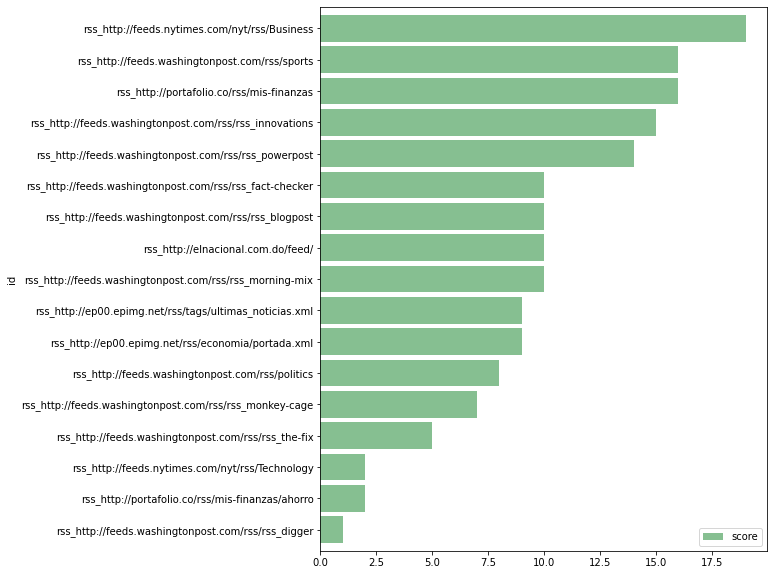

In [273]:
ax = maestro_cf_lgbm[maestro_cf_lgbm['score']>0].set_index('id').sort_values('score').plot(kind='barh', figsize=(8, 10), color='#86bf91', zorder=2, width=0.85)

In [180]:
# todas las variables

In [219]:
maestro_columnas_t=pd.DataFrame(X_train.columns.values).reset_index()
maestro_columnas_t.columns=['cod','id']
maestro_columnas_t['cod']='cod_'+maestro_columnas_t['cod'].astype(str)
maestro_columnas_t

,cod,id
0,cod_0,rss_http://elnacional.com.do/feed/
1,cod_1,rss_http://ep00.epimg.net/rss/economia/portada...
2,cod_2,rss_http://ep00.epimg.net/rss/tags/ultimas_not...
3,cod_3,rss_http://feeds.nytimes.com/nyt/rss/Business
4,cod_4,rss_http://feeds.nytimes.com/nyt/rss/Technology
...,...,...
158,cod_158,twitter_rcnradio
159,cod_159,twitter_rodriguezbraun
160,cod_160,twitter_sergiodigra
161,cod_161,twitter_suanzes


In [220]:
X_train_t_lgbm=X_train.copy()
X_train_t_lgbm.columns=maestro_columnas_t['cod'].values
X_train_t_lgbm

,cod_0,cod_1,cod_2,cod_3,cod_4,cod_5,cod_6,cod_7,cod_8,cod_9,...,cod_153,cod_154,cod_155,cod_156,cod_157,cod_158,cod_159,cod_160,cod_161,cod_162
date,,,,,,,,,,,,,,,,,,,,,
2021-12-30,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.441825,0.000000,0.000000,0.000000,...,0.000000,0.000,0.000,0.000000,0.000000,0.000000,0.000000,-0.799667,0.000000,0.000000
2022-01-03,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.592650,0.000000,0.000000,0.000000,...,-0.871000,-0.948,0.000,0.000000,0.000000,0.000000,0.000000,-0.707000,0.000000,0.000000
2022-01-04,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,-0.051600,0.000000,0.000000,0.000000,...,0.000000,0.000,-0.004,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2022-01-05,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.510600,0.000000,0.000000,0.000000,...,0.000000,0.000,0.000,0.000000,0.000000,0.000000,0.000000,-0.962000,0.000000,0.000000
2022-01-06,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,-0.474600,0.000000,0.000000,0.000000,...,0.000000,0.000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.276211,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-07,-0.356600,0.000,0.283778,-0.137087,-0.253625,-0.118538,0.223333,-0.002042,-0.398167,0.404000,...,0.000000,0.000,0.000,-0.414368,-0.474480,-0.439410,-0.645571,-0.303333,0.000000,0.240417
2022-04-08,-0.477067,0.000,0.213333,-0.004034,-0.070875,-0.151571,0.235750,0.049643,-0.427453,0.000000,...,-0.345333,0.000,0.000,-0.573576,-0.491955,-0.486162,-0.572182,-0.518200,0.000000,0.159167
2022-04-11,-0.403324,0.000,0.014500,-0.094467,-0.133750,-0.524571,-0.556000,-0.233187,-0.147259,-0.105000,...,0.000000,0.000,0.000,-0.545357,-0.494315,-0.617303,-0.451800,-0.158000,0.000000,0.198333


In [221]:
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_train_t_lgbm, y_train, test_size = 0.05, random_state = 86, shuffle= True)

In [222]:
modeloLgbm_trm=LGBMRegressor(boosting_type='gbdt', objective='regression', num_leaves=1200,
                                learning_rate=0.17, n_estimators=100, max_depth=80,
                                metric='rmse', bagging_fraction=0.8, feature_fraction=0.8, reg_lambda=0.9)

In [223]:
modeloLgbm_trm=modeloLgbm_trm.fit(X_train_r, y_train_r, eval_set=[(X_train_r, y_train_r), (X_test_r, y_test_r)])

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[1]	training's rmse: 29.6948	valid_1's rmse: 32.8562
[2]	training's rmse: 28.9131	valid_1's rmse: 34.4485
[3]	training's rmse: 28.5312	valid_1's rmse: 35.7819
[4]	training's rmse: 27.9964	valid_1's rmse: 35.3238
[5]	training's rmse: 27.6956	valid_1's rmse: 34.3122
[6]	training's rmse: 27.0039	valid_1's rmse: 35.6713
[7]	training's rmse: 26.4297	valid_1's rmse: 36.1841
[8]	training's rmse: 25.8394	valid_1's rmse: 37.5707
[9]	training's rmse: 25.5953	valid_1's rmse: 37.4342
[10]	training's rmse: 25.0936	valid_1's rmse: 37.2563
[11]	training's rmse: 24.8594	valid_1's rmse: 38.25
[12]	training's rmse: 24.3354	valid_1's rmse: 39.4808
[13]	training's rmse: 23.8856	valid_1's rmse: 40.135
[14]	training's rmse: 23.677	valid_1's rmse: 39.2868
[15]	training's 

In [224]:
ypred=modeloLgbm_trm.predict(X_test_r)
ypred

array([ -4.86413153, -22.40802274, -23.40037469,   9.15105462])

In [225]:
RMSE=mean_squared_error(y_test_r,ypred, squared=False)
RMSE2=mean_squared_error(y_test_r,ypred, squared=True)
MAPE=mean_absolute_percentage_error(y_test_r,ypred) 
print("RMSE:",RMSE," ","MAPE:",MAPE)

RMSE: 40.13167192429035   MAPE: 1.3214467854246852


In [226]:
modeloLgbm_trm.feature_importances_

array([ 0,  0,  0,  0,  0,  0,  2,  0,  0,  0,  0,  0,  0,  0,  2,  0,  0,
        0,  1,  3,  0,  0,  0,  0,  0,  0,  0, 12,  0,  4,  0,  3,  9,  9,
        1,  0,  0,  0,  0,  0,  0,  0, 10,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  2,  0,  0,  0,  0,  0,  0,  2,  1,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  2,  0,  0,  0,  4,  0,  6,
        0,  0,  0,  0,  0,  0,  2,  0,  0,  0,  2,  0,  2,  2,  1,  0,  0,
        1, 14,  6,  0,  0,  0,  1,  0,  0,  2,  0,  0,  0,  1,  3,  5,  0,
        0,  0,  0,  2,  0,  0,  1,  3,  1,  4,  0,  0,  0,  0,  1,  1,  0,
        2,  0,  0,  0,  0,  0,  0,  0,  2,  7,  0,  5,  1,  0,  0,  0,  7,
        4,  0,  0,  1,  0,  0,  0,  6,  0,  0])

In [227]:
len(modeloLgbm_trm.feature_importances_)

163

In [228]:
maestro_columnas_t

,cod,id
0,cod_0,rss_http://elnacional.com.do/feed/
1,cod_1,rss_http://ep00.epimg.net/rss/economia/portada...
2,cod_2,rss_http://ep00.epimg.net/rss/tags/ultimas_not...
3,cod_3,rss_http://feeds.nytimes.com/nyt/rss/Business
4,cod_4,rss_http://feeds.nytimes.com/nyt/rss/Technology
...,...,...
158,cod_158,twitter_rcnradio
159,cod_159,twitter_rodriguezbraun
160,cod_160,twitter_sergiodigra
161,cod_161,twitter_suanzes


In [229]:
maestro_columnas_t['score']=modeloLgbm_trm.feature_importances_

In [202]:
modeloLgbm_trm.get_booster().get_fscore()

AttributeError: 'LGBMRegressor' object has no attribute 'get_booster'

In [230]:
maestro_columnas_t.sort_values('score',ascending=False).head(30)

,cod,id,score
103,cod_103,twitter_LuisFelipeHenao,14
27,cod_27,rss_http://rssfeeds.usatoday.com/usatoday-News...,12
42,cod_42,rss_http://www.nytimes.com/services/xml/rss/ny...,10
33,cod_33,rss_http://www.eltiempo.com/rss/economia_finan...,9
32,cod_32,rss_http://www.eltiempo.com/rss/economia_empre...,9
145,cod_145,twitter_jleibovi,7
152,cod_152,twitter_mariovalencia01,7
84,cod_84,twitter_BvcColombia,6
104,cod_104,twitter_LuisFerMejia,6
160,cod_160,twitter_sergiodigra,6


In [231]:
selcollgmb=maestro_columnas_t.sort_values('score',ascending=False).head(30)['cod'].values
selcollgmb

array(['cod_103', 'cod_27', 'cod_42', 'cod_33', 'cod_32', 'cod_145',
       'cod_152', 'cod_84', 'cod_104', 'cod_160', 'cod_117', 'cod_147',
       'cod_128', 'cod_153', 'cod_82', 'cod_29', 'cod_19', 'cod_126',
       'cod_31', 'cod_116', 'cod_91', 'cod_122', 'cod_136', 'cod_95',
       'cod_111', 'cod_14', 'cod_60', 'cod_97', 'cod_98', 'cod_53'],
      dtype=object)

In [232]:
X_train_tc_lgbm=X_train_t_lgbm[selcollgmb]

In [233]:
X_train_tc_lgbm

,cod_103,cod_27,cod_42,cod_33,cod_32,cod_145,cod_152,cod_84,cod_104,cod_160,...,cod_91,cod_122,cod_136,cod_95,cod_111,cod_14,cod_60,cod_97,cod_98,cod_53
date,,,,,,,,,,,,,,,,,,,,,
2021-12-30,0.164488,0.000000,-0.061850,0.000000,0.000000,-0.366700,0.000000,0.000000,0.000,-0.799667,...,-0.724917,0.000000,-0.545167,-0.664429,0.000000,0.000000,0.000000,0.000000,0.000000,0.000
2022-01-03,-0.857090,0.840200,0.000000,0.000000,0.000000,-0.431500,0.000000,0.000000,-0.999,-0.707000,...,0.000000,0.000000,-0.887500,0.087500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000
2022-01-04,-0.550873,0.886000,-0.431000,0.000000,0.000000,-0.858750,0.000000,-0.444434,0.000,0.000000,...,0.000000,0.000000,-0.443800,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000
2022-01-05,-0.598374,0.000000,-0.836000,0.000000,0.000000,0.000000,0.000000,-0.465872,0.000,-0.962000,...,0.000000,0.000000,-0.999000,-0.176500,0.000000,0.000000,0.000000,0.013240,0.000000,0.000
2022-01-06,-0.718302,0.000000,-0.362025,0.000000,0.000000,0.000000,0.000000,-0.297662,0.000,0.000000,...,0.000000,0.000000,-0.964000,-0.596800,0.000000,0.000000,0.000000,-0.374398,0.000000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-07,-0.991750,0.728533,0.153000,-0.580250,-0.501000,0.000000,-0.993000,0.000000,0.000,-0.303333,...,0.000000,-0.461136,0.000000,0.453000,-0.566812,-0.023167,-0.363444,0.000000,-0.749000,0.000
2022-04-08,-0.662064,0.844143,-0.296000,-0.533500,-0.584714,-0.733867,-0.691077,-0.887200,0.000,-0.518200,...,0.000000,-0.497380,-0.707583,-0.781857,-0.786849,0.103286,-0.253000,0.000000,-0.488889,-0.581
2022-04-11,-0.666647,0.612036,-0.005333,-0.909667,-0.549000,0.000000,-0.853833,-0.731000,0.000,-0.158000,...,-0.852800,-0.537070,-0.624143,-0.385600,-0.851909,-0.163000,-0.493500,-0.067000,-0.821780,0.000


In [234]:
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_train_tc_lgbm, y_train, test_size = 0.05, random_state = 86, shuffle= True)

In [235]:
modeloLgbm_trm=LGBMRegressor(boosting_type='gbdt', objective='regression', num_leaves=1200,
                                learning_rate=0.17, n_estimators=100, max_depth=80,
                                metric='rmse', bagging_fraction=0.8, feature_fraction=0.8, reg_lambda=0.9)

In [236]:
modeloLgbm_trm=modeloLgbm_trm.fit(X_train_r, y_train_r, eval_set=[(X_train_r, y_train_r), (X_test_r, y_test_r)])

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[1]	training's rmse: 29.6948	valid_1's rmse: 32.8562
[2]	training's rmse: 28.9131	valid_1's rmse: 34.4485
[3]	training's rmse: 28.5312	valid_1's rmse: 35.7819
[4]	training's rmse: 27.8562	valid_1's rmse: 35.0073
[5]	training's rmse: 27.1235	valid_1's rmse: 36.4184
[6]	training's rmse: 26.4827	valid_1's rmse: 37.7731
[7]	training's rmse: 25.8958	valid_1's rmse: 38.4138
[8]	training's rmse: 25.6214	valid_1's rmse: 39.5087
[9]	training's rmse: 25.0693	valid_1's rmse: 38.76
[10]	training's rmse: 24.8287	valid_1's rmse: 38.5878
[11]	training's rmse: 24.3946	valid_1's rmse: 38.8277
[12]	training's rmse: 24.1676	valid_1's rmse: 37.9929
[13]	training's rmse: 23.9653	valid_1's rmse: 37.56
[14]	training's rmse: 23.5117	valid_1's rmse: 38.3967
[15]	training's 

In [237]:
ypred=modeloLgbm_trm.predict(X_test_r)
ypred

array([-10.42363569, -13.66095638, -22.99110392,   9.8222653 ])

In [238]:
RMSE=mean_squared_error(y_test_r,ypred, squared=False)
RMSE2=mean_squared_error(y_test_r,ypred, squared=True)
MAPE=mean_absolute_percentage_error(y_test_r,ypred) 
print("RMSE:",RMSE," ","MAPE:",MAPE)

RMSE: 36.210582953987114   MAPE: 1.1811586330181214
